# Global Power Plant Database

#### Problem Statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below.
Downlaod Files: https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## Importing Dataset

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [6]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the dataset having 907 rows and 27 columns

In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [8]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking shape
df.shape

(907, 27)

In [10]:
#checking for duplicate value
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(907, 27)

No duplicate item present

In [13]:
# checking column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observations:

Among 21 columns, there are 10 float values and 11 are object types.

country ,country_long, name, gppd_idnr, primary_fuel, source, url are object datatypes with 907 non null values.

There are two target variable , primary_fuel and capacity_mw

primary_fuel is a categorical data, needs classification model to predict this.

capacity_mw is a categorical data, needs regression model to predict this.

In [15]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## Checking Null values

In [17]:
null_val= df.isna().sum()
null_val_per =(null_val/df.shape[0])*100
l= [null_val, null_val_per]
print("missing value \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value 

                           Null Values  Null Values percentage
country                             0                0.000000
url                                 0                0.000000
primary_fuel                        0                0.000000
capacity_mw                         0                0.000000
source                              0                0.000000
gppd_idnr                           0                0.000000
name                                0                0.000000
country_long                        0                0.000000
geolocation_source                 19                2.094818
latitude                           46                5.071665
longitude                          46                5.071665
commissioning_year                380               41.896362
year_of_capacity_data             388               42.778390
generation_data_source            458               50.496141
generation_gwh_2018               459               5

<AxesSubplot:>

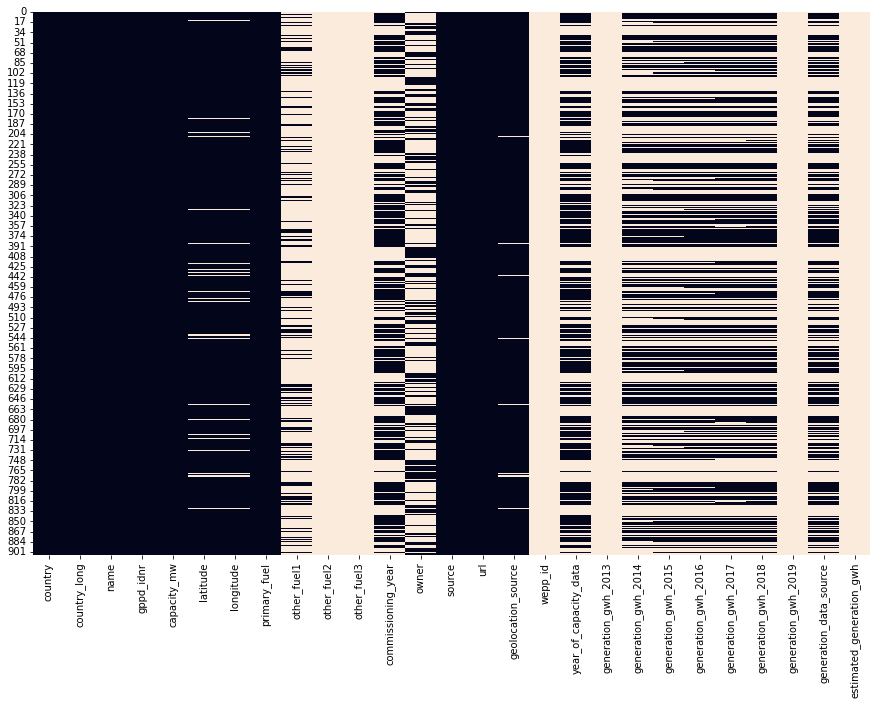

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False)

Observations:
    
Null values are present in the total dataset.

other_fuel3, generation_gwh_2019, generation_gwh_2013, wepp_id, estimated_generation_gwh are totally blank column. 100% datas are missing. Remove all these 5 columns.

other_fuel2 has 99.89 % missing data, need to remove this.

other_fuel1 has 78 % missing data.

only 8 columns among all 27 columns

In [22]:
df.drop(['other_fuel3', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id', 
           'estimated_generation_gwh', 'other_fuel2'],axis=1,inplace= True)
df.shape

(907, 21)

In [24]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

country, year_of_capacity_data,generation_data_source and country_long has only one unique value i.e. Removing these columns.

In [26]:
df.drop(['country', 'country_long', 'year_of_capacity_data','generation_data_source'],axis=1,inplace= True)
df.shape

(907, 17)

Geolocation_source is a categorical data, need to impute this with mode.

Latitude, longitude is a numarical data,missing values of it can be imputed by mean or median of longitude and latitude.

Commissioning_year is a numarical data, it has 41.9 % missing data.

Year_of_capacity_data is a numarical data, it has 42.8 % missing data.

Other_fuel1 has 78% missing data. Need to impute this by further exploration

Owner has 62% mssing data. Need to impute this by further exploration

Generation_gw hours of year 2014 to 2018 has more than 50% missing data. Need to impute this by further exploration

### Impute geolocation_source:

In [27]:
df["geolocation_source"].mode()

0    WRI
dtype: object

In [28]:
df["geolocation_source"].fillna("WRI", inplace=True)

In [29]:
df["geolocation_source"].isna().sum()

0

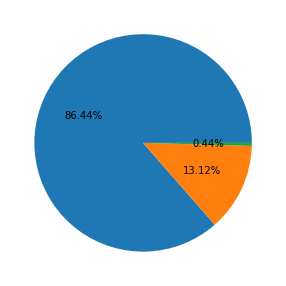

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df['geolocation_source'].value_counts(), autopct='%1.2f%%')
plt.show()

geolocation_source has no null

### longitude, Impute latitude

Text(0, 0.5, 'latitude')

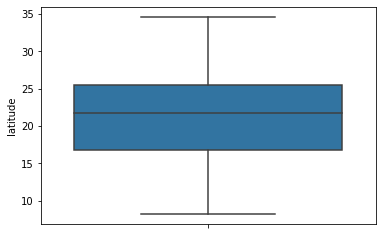

In [33]:
sns.boxplot( y='latitude', data=df)
plt.ylabel('latitude')

latitude has no outliers

Text(0, 0.5, 'longitude')

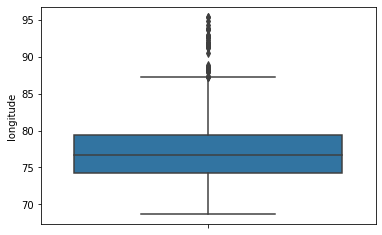

In [34]:
sns.boxplot( y='longitude', data=df)
plt.ylabel('longitude')

In [36]:
data=df

As 'longitude' has some outliers, impute the null values with median().

In [37]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].median())

In [38]:
print (data["latitude"].isna().sum())
print (data["longitude"].isna().sum())

0
0


In [39]:
# `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

data["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

'commissioning_year' has no such effect on Global_Power_Plant as it indicates the years of establishment. Let's convert it into ages as it makes sense.

In [41]:
data['age'] = 2022 - data['commissioning_year']
data.drop(columns=['commissioning_year'],inplace=True)

Text(0, 0.5, 'age')

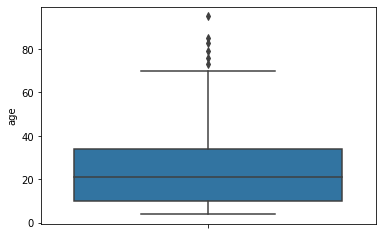

In [42]:
sns.boxplot( y='age', data=data)
plt.ylabel('age')

As age is some numarical data, let's impute it by mean of the dataset

In [43]:
data['age'] = data['age'].fillna(data['age'].mean())

In [44]:
data["age"].isna().sum()

0

In [46]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value 

                      Null Values  Null Values percentage
name                           0                0.000000
geolocation_source             0                0.000000
url                            0                0.000000
primary_fuel                   0                0.000000
source                         0                0.000000
latitude                       0                0.000000
capacity_mw                    0                0.000000
gppd_idnr                      0                0.000000
longitude                      0                0.000000
age                            0                0.000000
generation_gwh_2018          459               50.606395
generation_gwh_2017          467               51.488423
generation_gwh_2016          473               52.149945
generation_gwh_2015          485               53.472988
generation_gwh_2014          509               56.119074
owner                        565               62.293275
other_fuel1   

Still the dataset have 7 columns with missing datas. Let's impute this after some more steps.

name, gppd_idnr, primary_fuel, source, url has object values. Let's deal with them.

### Exploration of categorical features:

In [47]:
data["url"].head()

0    http://www.nrel.gov/csp/solarpaces/project_det...
1                      http://www.ultratechcement.com/
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                               http://www.cea.nic.in/
4                               http://www.cea.nic.in/
Name: url, dtype: object

In [49]:
data["url"].nunique()

304

In [50]:
data["gppd_idnr"].head()

0    WRI1020239
1    WRI1019881
2    WRI1026669
3    IND0000001
4    IND0000002
Name: gppd_idnr, dtype: object

In [51]:
data["gppd_idnr"].nunique()

907

In [52]:
data["source"].head()

0    National Renewable Energy Laboratory
1                    Ultratech Cement ltd
2                                     CDM
3           Central Electricity Authority
4           Central Electricity Authority
Name: source, dtype: object

In [53]:
data["source"].nunique()

191

In [54]:
data["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

Source has 191 unique values but Central Electricity Authority has the maximum counts (519) and CDM has 123 counts.

In [55]:
data["name"].head()

0            ACME Solar Tower
1         ADITYA CEMENT WORKS
2    AES Saurashtra Windfarms
3                 AGARTALA GT
4                AKALTARA TPP
Name: name, dtype: object

In [56]:
data["name"].nunique()

907

In [57]:
data["owner"].head()

0             Solar Paces
1    Ultratech Cement ltd
2                     AES
3                     NaN
4                     NaN
Name: owner, dtype: object

gppd_idnr, url, owner, name doesnot makes any sense that is those features seems no effects on the total dataset. Let's remove it.

In primary fuel the maximum counts is for hydro and coal

In [58]:
data.drop(['gppd_idnr', 'url', 'owner', 'name'], axis=1, inplace= True)

In [59]:
data["source"].head()

0    National Renewable Energy Laboratory
1                    Ultratech Cement ltd
2                                     CDM
3           Central Electricity Authority
4           Central Electricity Authority
Name: source, dtype: object

In [60]:
data["source"].nunique()

191

In [61]:
data["geolocation_source"].head()

0    National Renewable Energy Laboratory
1                                     WRI
2                                     WRI
3                                     WRI
4                                     WRI
Name: geolocation_source, dtype: object

In [62]:
data["geolocation_source"].nunique()

3

In [63]:
data["other_fuel1"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    Oil
Name: other_fuel1, dtype: object

In [64]:
data["other_fuel1"].nunique()

3

### Checking duplicate values

In [65]:
#checking duplicate

data.duplicated().sum()

1

In [66]:
data.drop_duplicates(keep= 'first',inplace= True )

In [67]:
data.shape

(906, 13)

1 dupplicate row found in the dataset after removing the dataset is free from duplicates.

## Statistical features:

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          906 non-null    float64
 1   latitude             906 non-null    float64
 2   longitude            906 non-null    float64
 3   primary_fuel         906 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   source               906 non-null    object 
 6   geolocation_source   906 non-null    object 
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
 12  age                  906 non-null    float64
dtypes: float64(9), object(4)
memory usage: 99.1+ KB


In [69]:
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
count,906.000000,906.000000,906.000000,398.000000,422.000000,434.000000,440.000000,448.000000,906.000000
mean,326.558991,21.197918,77.427884,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,24.908918
std,590.324956,6.082506,4.817675,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,13.023550
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.612500,17.065350,74.387550,223.557672,176.381063,188.285252,177.874930,193.378250,19.000000
50%,59.600000,21.292250,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,24.908918
75%,386.625000,25.178075,79.207350,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,24.908918
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


Null values are still present. Deal that values later with further more process.

Seems outliers are present in capacity_mw, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 and age. Need to remove that.

generation_gwh of 2014-2018 has min values 0

## EDA - Exploratory data analysis

### Analysis of Target feature:

### 1. Primary Fuel:

In [71]:
data["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       122
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

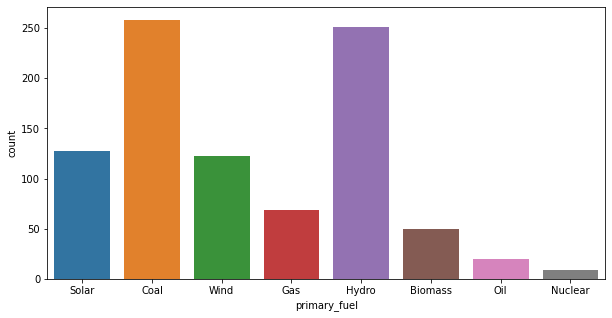

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(data['primary_fuel'])
plt.show()

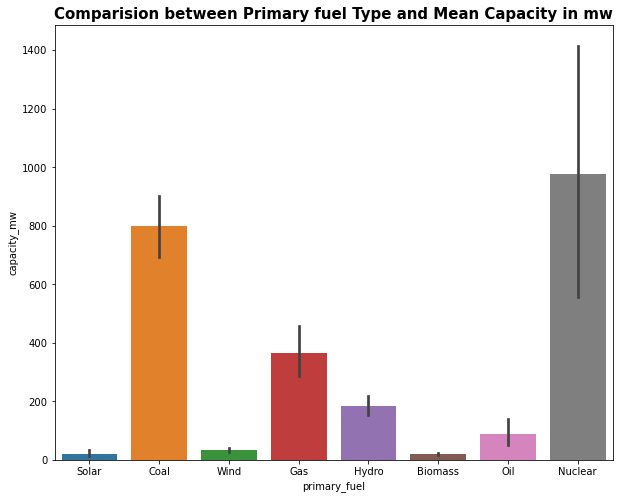

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=15, fontweight='bold')
plt.show()

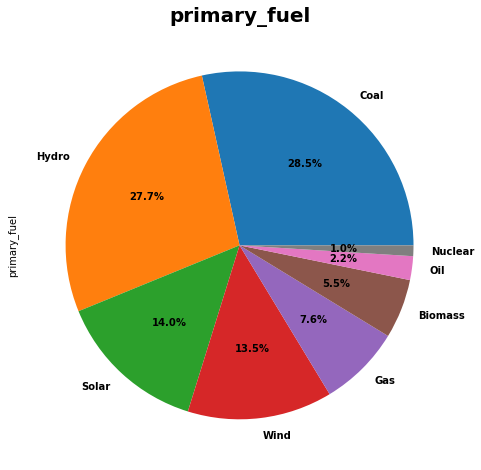

In [74]:
plt.subplots(figsize=(8,8))
data['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('primary_fuel', fontsize=20,fontweight ='bold')
plt.show()

The max fuel type is coal 28.5% then hydro 27.7%

The min fuel type is nuclear 1.0%. There are only 9 Nuclear plant.

Around 60 % powerplant are renewable energy based (hydro+ solar+ wind+ biomass+ nuclear).

Around 40 % powerplant are non renewable energy based.

### 2.capacity_mw:

In [76]:
print('Maximum capacity of Global_Power_Plant:',data.capacity_mw.max(),"MW")
print('Minimum capacity of Global_Power_Plant:',data.capacity_mw.min(),"MW")
print('Mean capacity of Global_Power_Plant:',data.capacity_mw.mean(),"MW")
print('Sum of the capacity of Global_Power_Plant:',data.capacity_mw.sum(),"MW")

Maximum capacity of Global_Power_Plant: 4760.0 MW
Minimum capacity of Global_Power_Plant: 0.0 MW
Mean capacity of Global_Power_Plant: 326.55899116997796 MW
Sum of the capacity of Global_Power_Plant: 295862.446 MW


In [77]:
print ('The number of values with maximum capacity_mw', data['capacity_mw'].value_counts()[4760.0])

The number of values with maximum capacity_mw 1


In [78]:
print ('The number of values with minimum capacity_mw', data['capacity_mw'].value_counts()[0.0])

The number of values with minimum capacity_mw 1


In [79]:
print(" Details of maximum capacity_mw value whicch is 4760 MW:\n\n ")

data.loc[data.capacity_mw==4760]

 Details of maximum capacity_mw value whicch is 4760 MW:

 


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
880,4760.0,24.0983,82.6719,Coal,Oil,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,20.0


In [80]:
print(" Details of minimum capacity_mw value whicch is 0 MW:\n\n ")

data.loc[data.capacity_mw==0]

 Details of minimum capacity_mw value whicch is 0 MW:

 


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
829,0.0,12.8491,77.6752,Solar,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,24.908918


The primary fuel of the power plan with max capacity_mw is coal and the max value is 4760 and geolocation_source is WRI. The age of the power plant is 20 and commision year is 2002.

The primary fuel of the power plan with min capacity_mw is solar and the min value is 0 and geolocation_source is Industry About. Seems the data entry must be error as if powerplant is commissioned, it cannot have capacity_mw 0.

Mean of the capacity_mw is 326 MW.

Sum of the capacity_mw is 295862 MW.

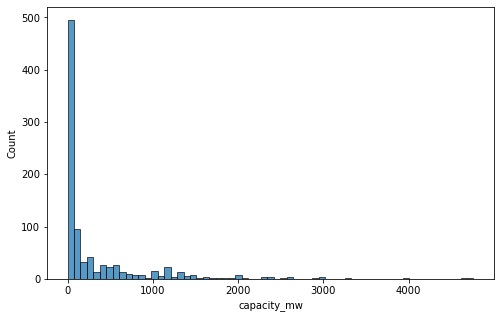

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(data.capacity_mw)
plt.show()

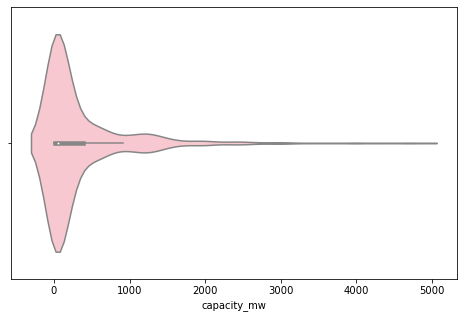

In [83]:
plt.figure(figsize=(8,5))
sns.violinplot(data.capacity_mw, color='pink')
plt.show()

In [84]:
cap1500 = data.loc[data.capacity_mw < 1500].shape
cap1500

(863, 13)

In [85]:
# percentage of capacity_mw < 1500:
print ("Percentage of capacity_mw < 1500 is:", cap1500[0]/data.shape[0]*100,"%")

Percentage of capacity_mw < 1500 is: 95.25386313465783 %


In [86]:
data["capacity_mw"].groupby(data["primary_fuel"]).agg([min, max, sum])

,min,max,sum
primary_fuel,,,
Biomass,10.00,50.00,1003.260
Coal,10.00,4760.00,205839.220
Gas,15.50,1967.08,25172.506
Hydro,3.30,1956.00,46441.770
Nuclear,100.00,2000.00,8780.000
Oil,21.84,500.00,1778.840
Solar,0.00,648.00,2757.500
Wind,1.00,200.00,4089.350


The primary fuel with maximum sum of capacity MW is coal and it is 205839 MW.

Also the maximum value of capacity of the power plant is also coal.

The primary fuel with minimum sum of capacity MW is biomass and it is1003 MW.

### EDA

### Checking "primary_fuel" Vs "generation_gwh" for year 2014-2018:

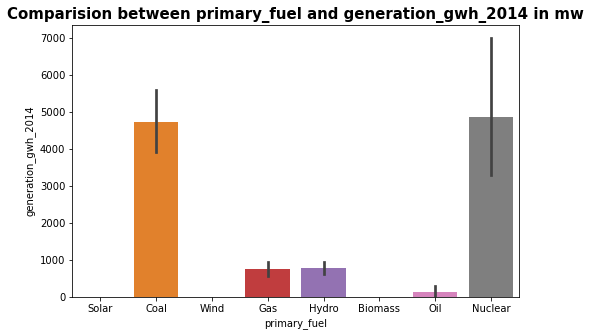

In [88]:
# Checking generation growth in 2014
plt.figure(figsize=(8,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = data)
plt.title('Comparision between primary_fuel and generation_gwh_2014 in mw', fontsize=15, fontweight='bold')
plt.show()

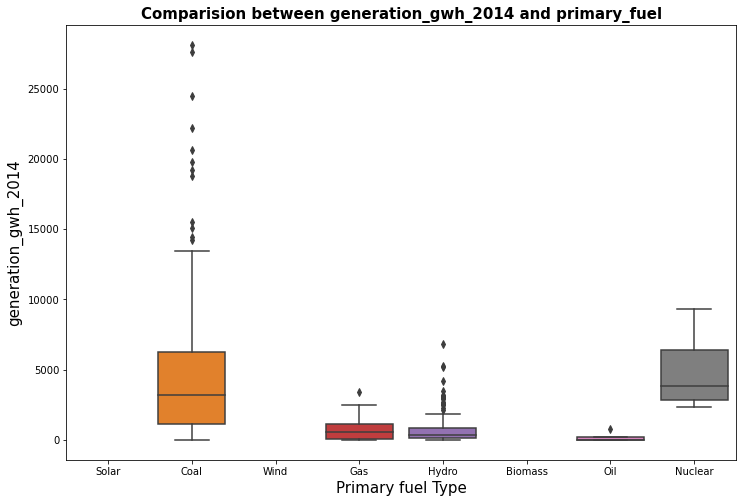

In [89]:
# check how the primary_fuel is reated to generation_gwh_2014 
plt.figure(figsize=[12,8])
plt.title('Comparision between generation_gwh_2014 and primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(data['primary_fuel'],data["generation_gwh_2014"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('generation_gwh_2014',fontsize=15)
plt.show()

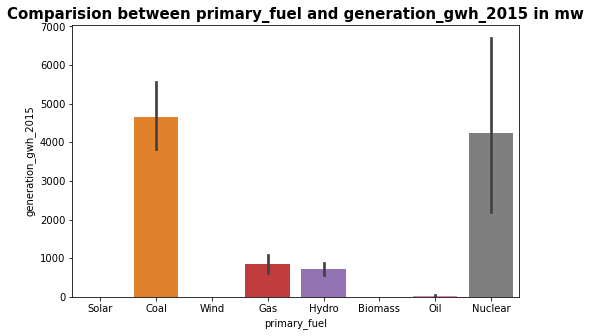

In [90]:
# Checking generation growth in 2015
plt.figure(figsize=(8,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = data)
plt.title('Comparision between primary_fuel and generation_gwh_2015 in mw', fontsize=15, fontweight='bold')
plt.show()

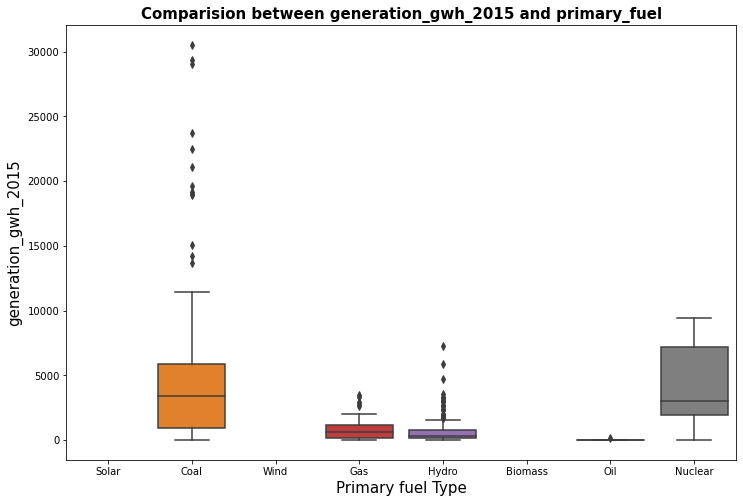

In [91]:
# check how the primary_fuel is reated to generation_gwh_2015 
plt.figure(figsize=[12,8])
plt.title('Comparision between generation_gwh_2015 and primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(data['primary_fuel'],data["generation_gwh_2015"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('generation_gwh_2015',fontsize=15)
plt.show()

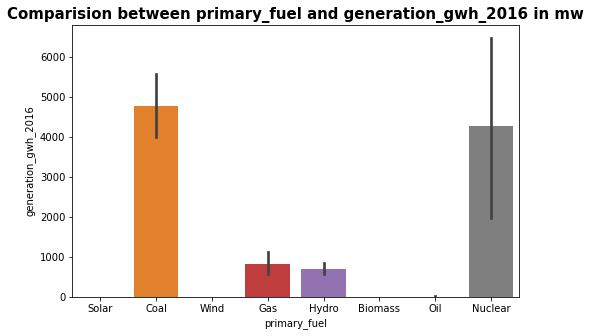

In [92]:
# Checking generation growth in 2016
plt.figure(figsize=(8,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = data)
plt.title('Comparision between primary_fuel and generation_gwh_2016 in mw', fontsize=15, fontweight='bold')
plt.show()

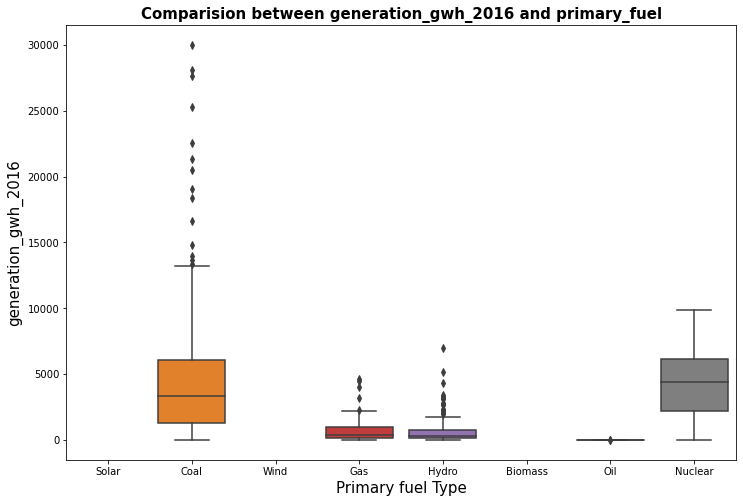

In [93]:
# check how the primary_fuel is reated to generation_gwh_2016 
plt.figure(figsize=[12,8])
plt.title('Comparision between generation_gwh_2016 and primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(data['primary_fuel'],data["generation_gwh_2016"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('generation_gwh_2016',fontsize=15)
plt.show()

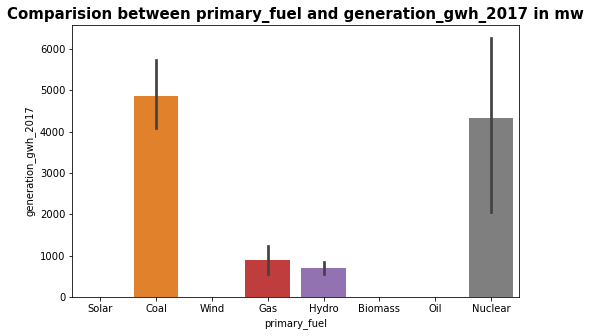

In [94]:
# Checking generation growth in 2017
plt.figure(figsize=(8,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = data)
plt.title('Comparision between primary_fuel and generation_gwh_2017 in mw', fontsize=15, fontweight='bold')
plt.show()

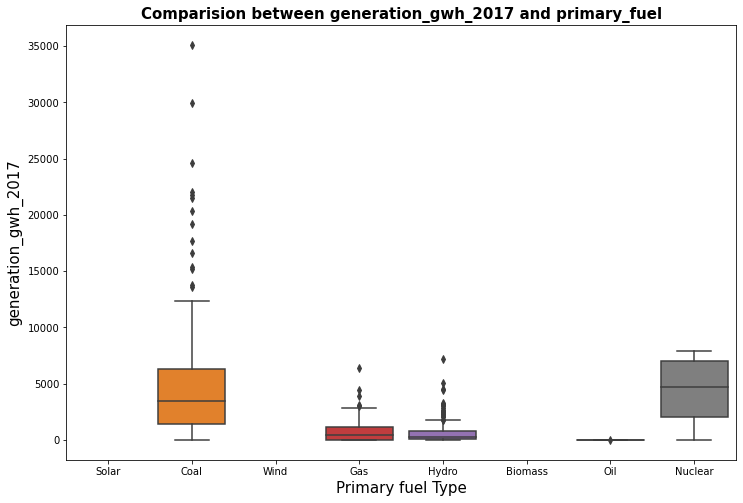

In [95]:
# check how the primary_fuel is reated to generation_gwh_2017
plt.figure(figsize=[12,8])
plt.title('Comparision between generation_gwh_2017 and primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(data['primary_fuel'],data["generation_gwh_2017"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('generation_gwh_2017',fontsize=15)
plt.show()

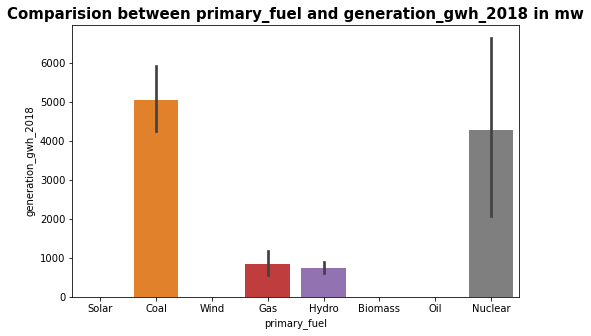

In [96]:
# Checking generation growth in 2018
plt.figure(figsize=(8,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = data)
plt.title('Comparision between primary_fuel and generation_gwh_2018 in mw', fontsize=15, fontweight='bold')
plt.show()

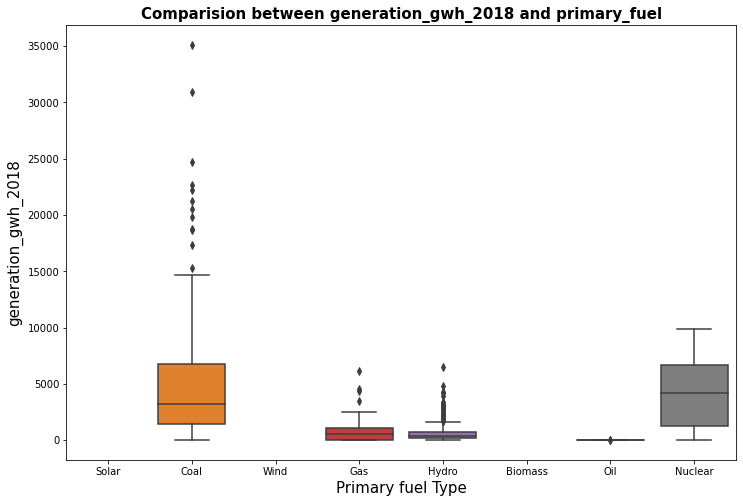

In [97]:
# check how the primary_fuel is reated to generation_gwh_2018 
plt.figure(figsize=[12,8])
plt.title('Comparision between generation_gwh_2018 and primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(data['primary_fuel'],data["generation_gwh_2018"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('generation_gwh_2018',fontsize=15)
plt.show()

Coal is the highest mean generation growth for every years 2014-2018.

For every year solar, wind and biomass fuel generation is negligible.

Nuclear is the second highest mean generation growth for every years 2014-2018.

outliers are present in generation growth of coal fuel type for every year

### Checking "primary_fuel" Vs "latitude" :

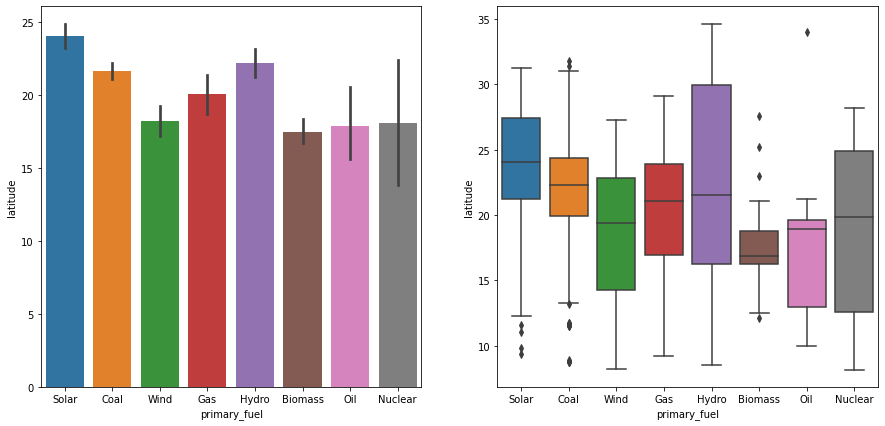

In [98]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x = "primary_fuel", y = "latitude", data = data,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "latitude",data=data,ax=ax[1])
plt.show()

avg latitude range is in between 15-25.

Max latitude is for solar and hydro.

Outliers are present in latitude.

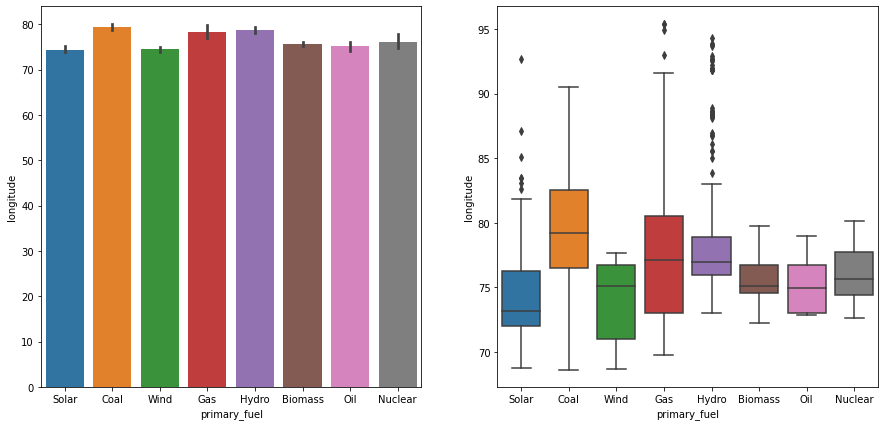

In [99]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x = "primary_fuel", y = "longitude", data = data,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "longitude",data=data,ax=ax[1])
plt.show()

avg longitude range is in between 70-80.

Max latitude is for coal .

Outliers are present in longitude.

### Checking "primary_fuel" Vs "age" :

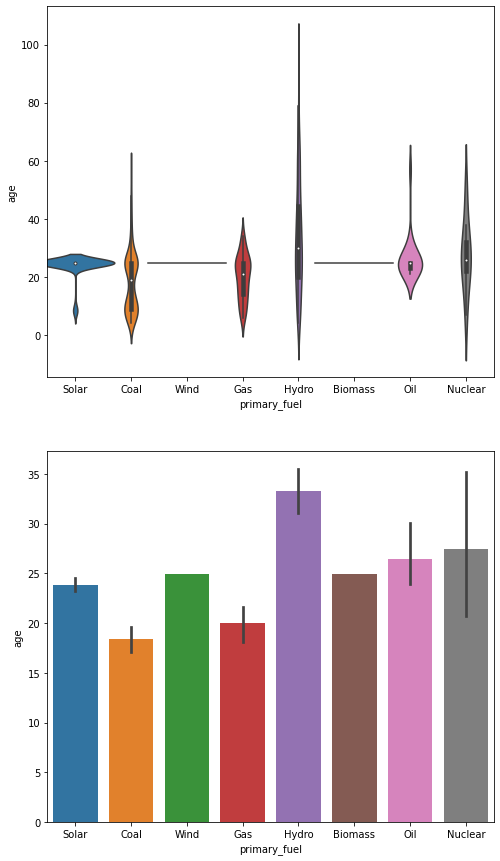

In [101]:
f,ax=plt.subplots(2,1,figsize=(8,15))
sns.violinplot(x = "primary_fuel", y = "age", data = data,ax=ax[0],width=1.4)
sns.barplot(x = "primary_fuel", y = "age",data=data,ax=ax[1])
plt.show()

Age of Hydro fuel is max.

outliers are present

### Checking "capacity_mw" Vs "generation_gwh" for year 2014-2018:

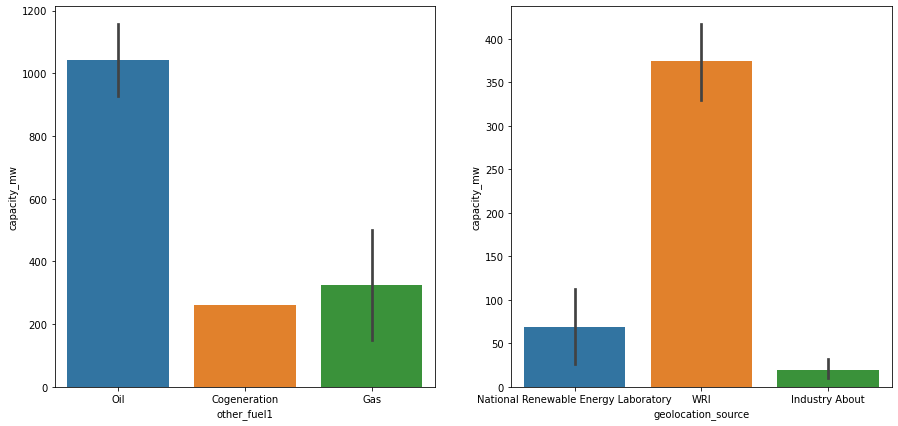

In [102]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x = "other_fuel1", y = "capacity_mw", data = data,ax=ax[0])
sns.barplot(x = "geolocation_source", y = "capacity_mw",data=data,ax=ax[1])
plt.show()

The capacity of "geolocation_source" WRI is maximum which has capacity_mw> 350 MW.

The capacity of "geolocation_source" Industry is minimum which has capacity_mw<30 MW.

### Comparison our two target variable:

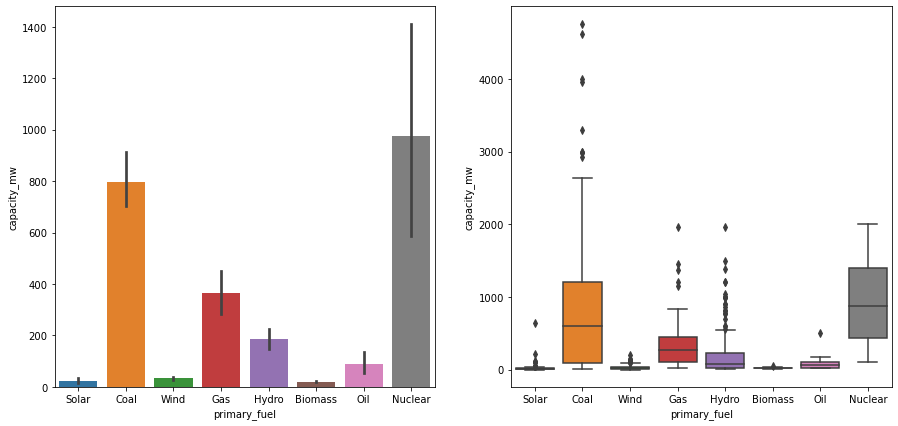

In [103]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "capacity_mw",data=data,ax=ax[1])
plt.show()

Neuclear power plant is the max capacity and biomass and solar have min capacity in MW

### Data distribution analysis for numarical data:

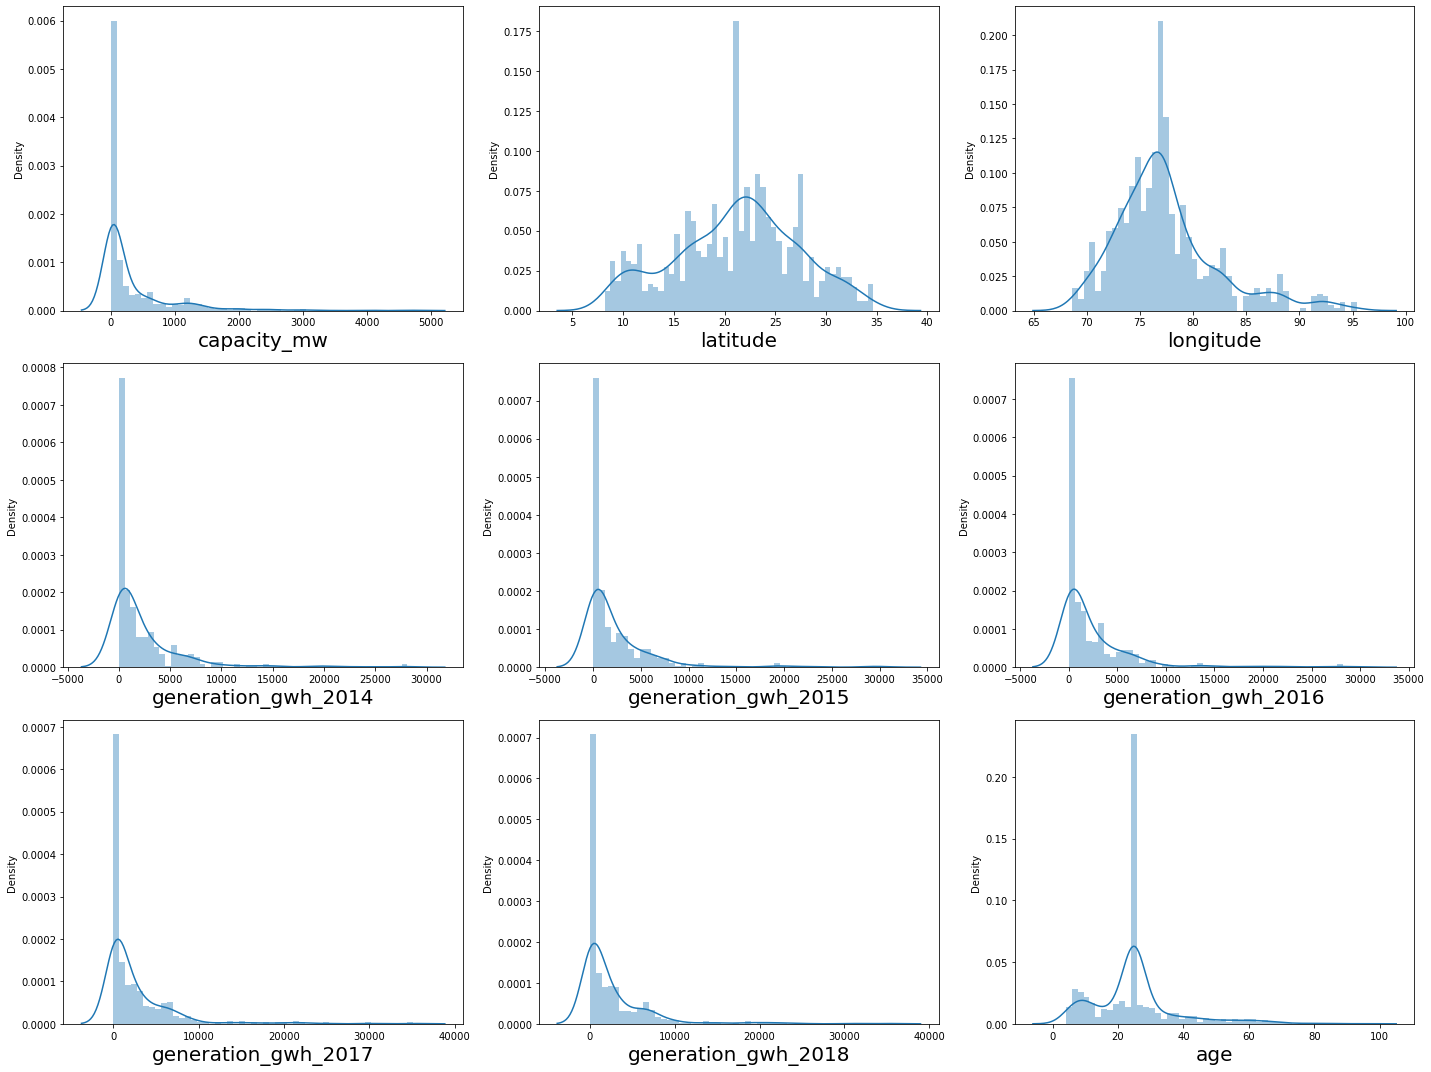

In [104]:
#distribution of numerical features.
data_num= data[["capacity_mw","latitude", "longitude", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016",
               "generation_gwh_2017", "generation_gwh_2018","age"]]
i=0
plt.figure(figsize=(20,15))
for p in data_num.columns:
    plt.subplot(3,3,i+1)
    sns.distplot(data_num[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1
    
plt.tight_layout()

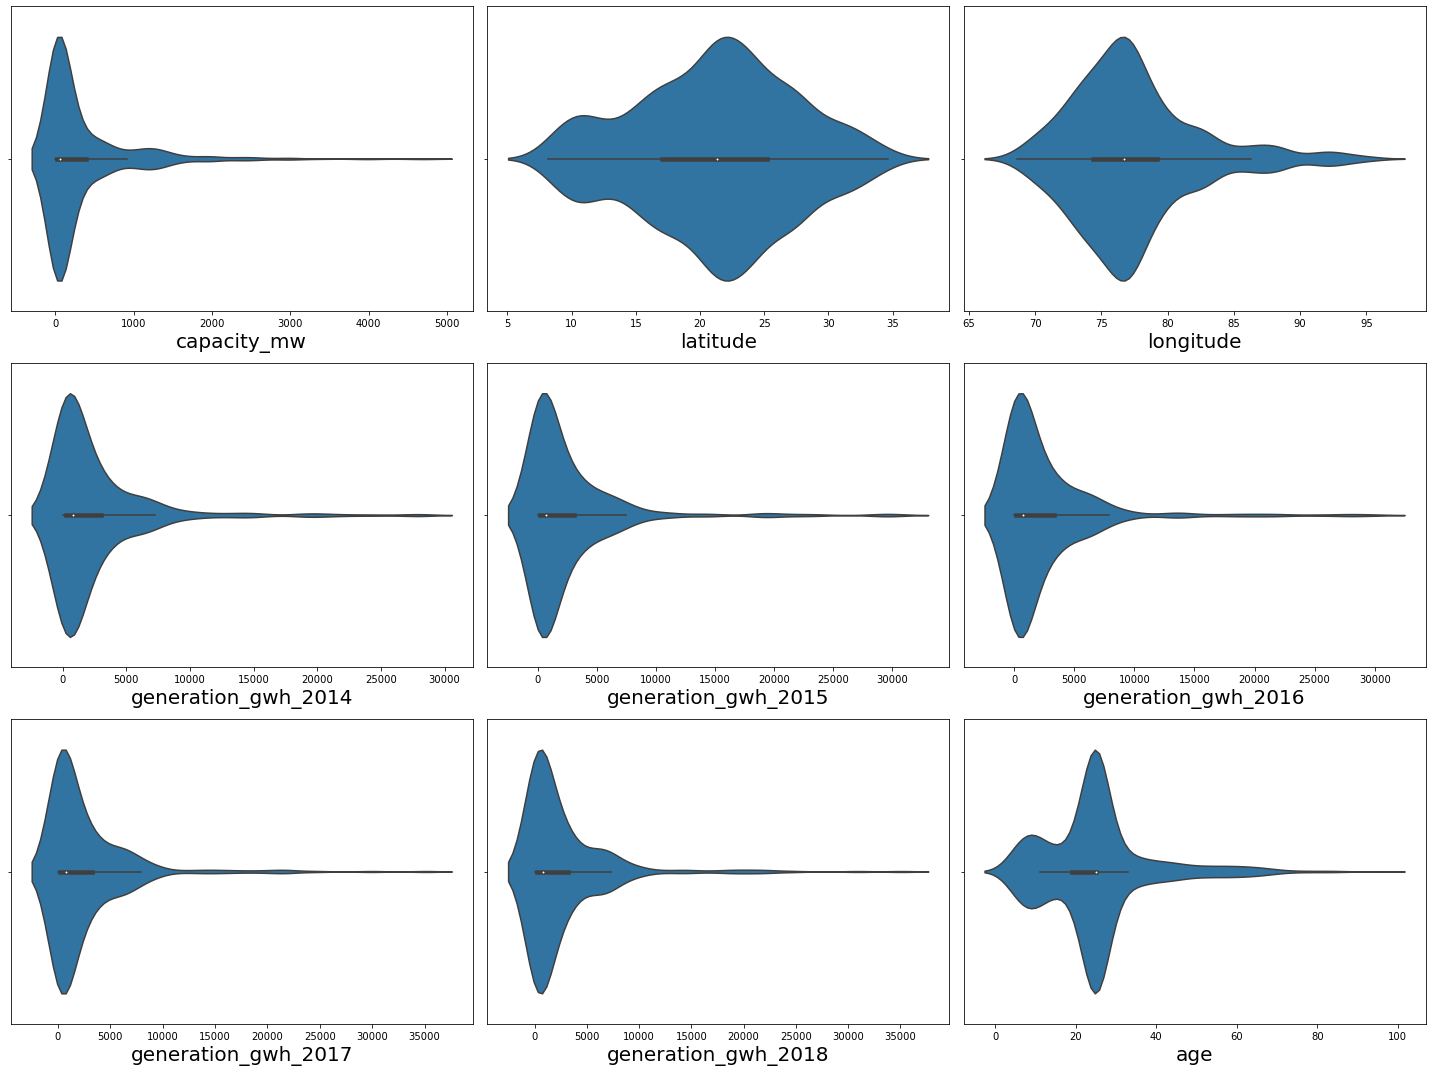

In [105]:
#distribution of numerical features.
data_num= data[["capacity_mw","latitude", "longitude", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016",
               "generation_gwh_2017", "generation_gwh_2018","age"]]
i=0
plt.figure(figsize=(20,15))
for p in data_num.columns:
    plt.subplot(3,3,i+1)
    sns.violinplot(data_num[p])
    plt.xlabel(p,fontsize=20)
    i+=1
    
plt.tight_layout()

The data is not normally distributed in all the columns except latitude and longitude.

Most of the columns are skewed to right.

Need to remove the skewness in all these columns except the label.

### Bivariate Analysis:

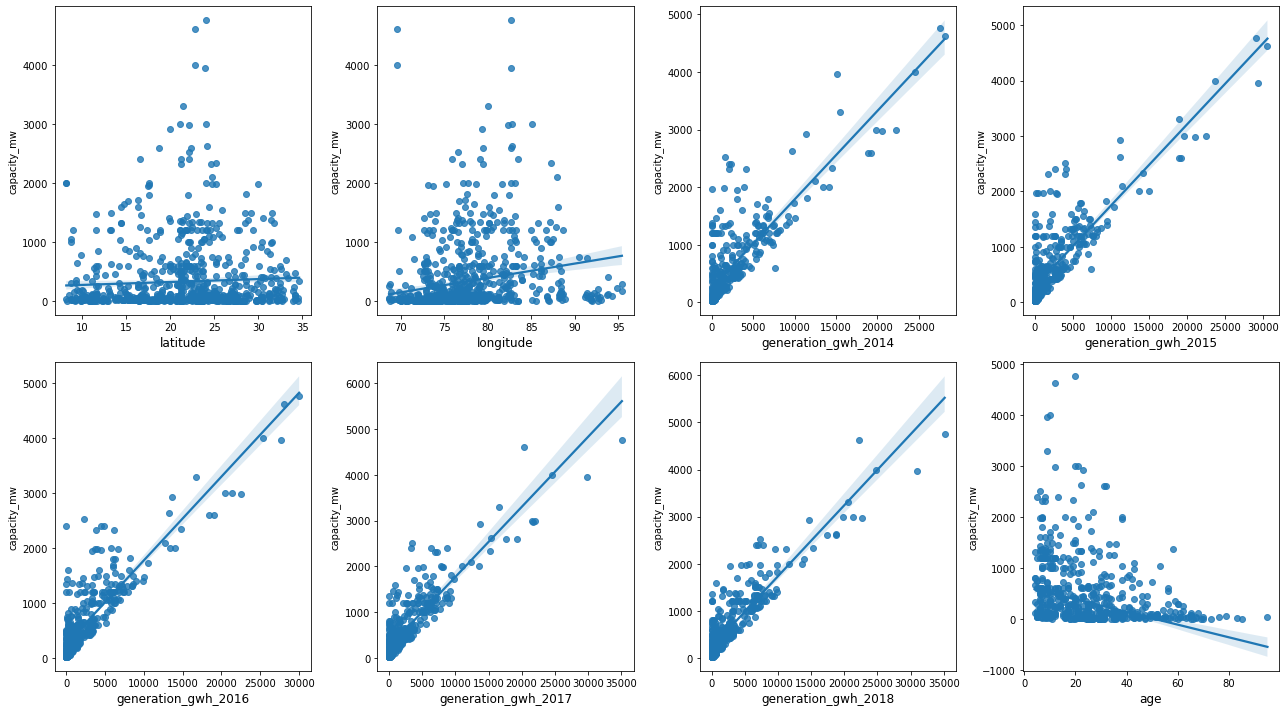

In [108]:
#linear regplot with distribution of numerical features with capacity_mw

data_num = data[["capacity_mw","latitude", "longitude", "generation_gwh_2014", "generation_gwh_2015"
                ,"generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018", "age"]]
i=0
plt.figure(figsize=(18,10))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(2,4,i+1)
    sns.regplot(x=p, y='capacity_mw', data=data_num)
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

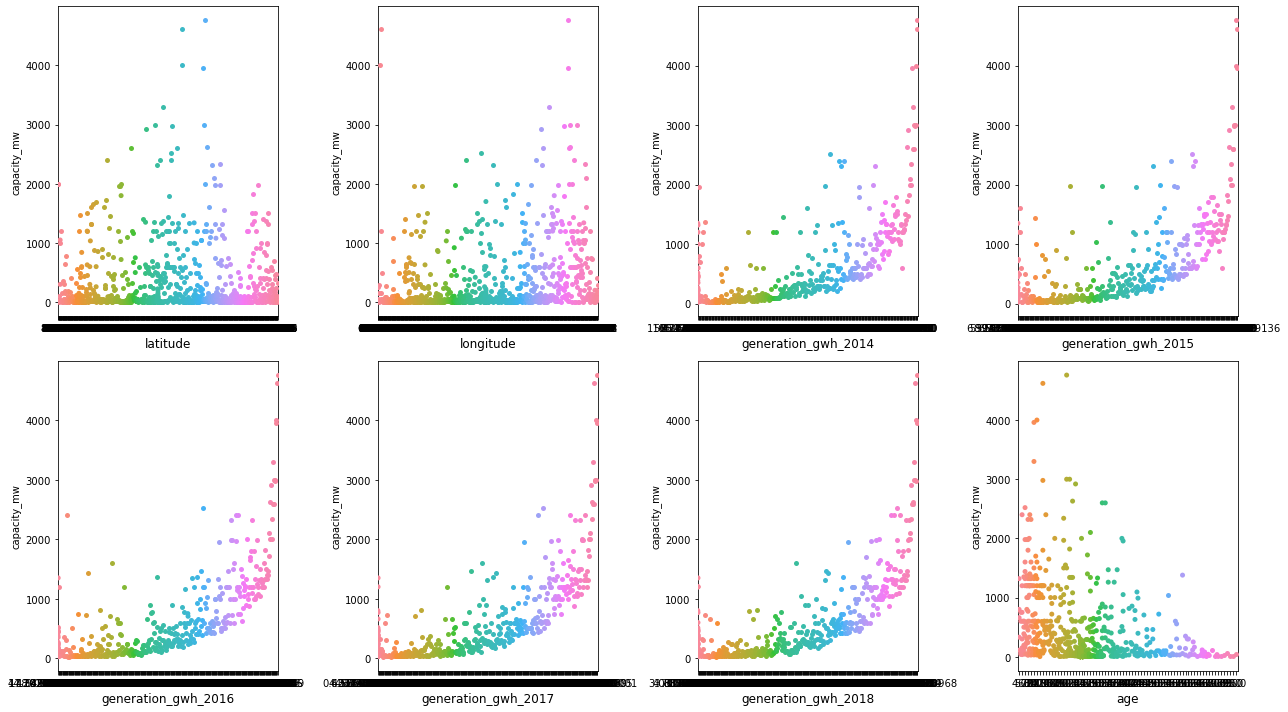

In [112]:
i=0
plt.figure(figsize=(18,10))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(2,4,i+1)
    sns.swarmplot(x=p, y='capacity_mw', data=data_num)
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

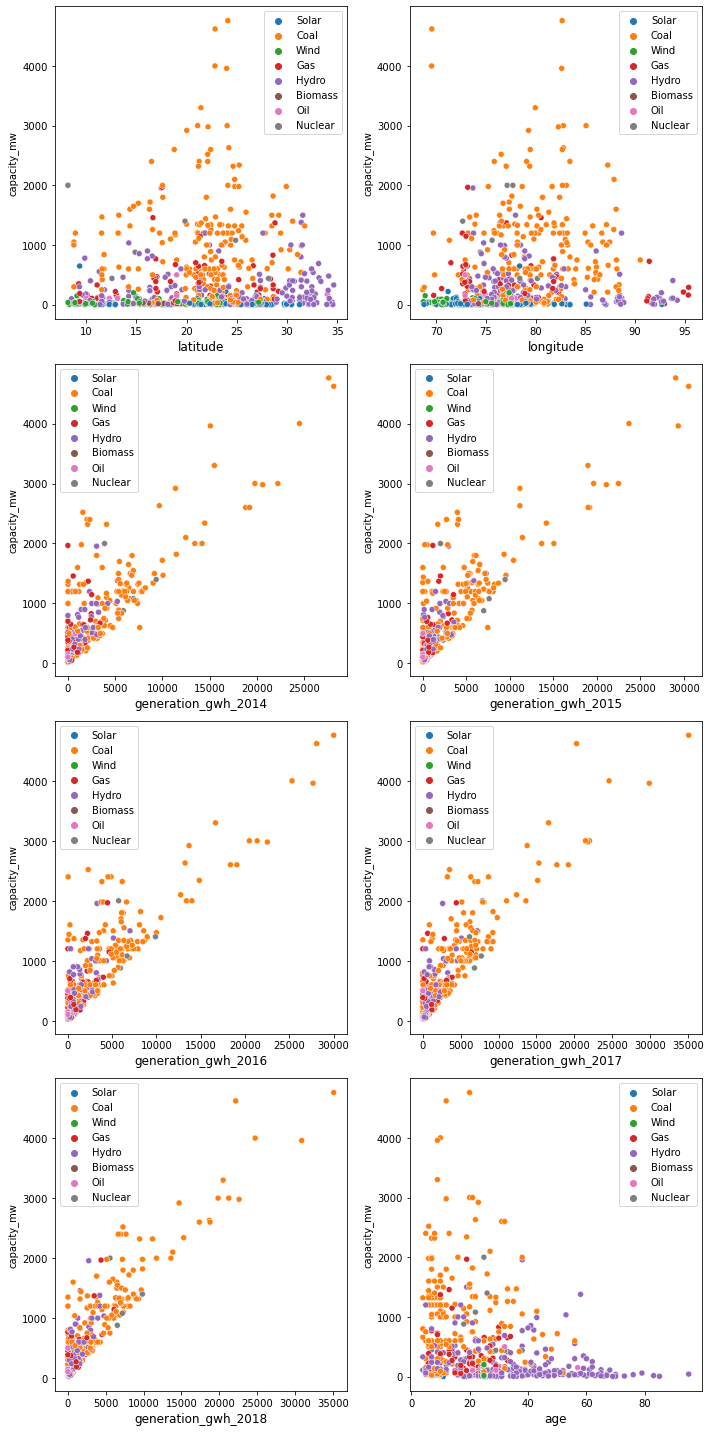

In [113]:
#linear regplot with distribution of numerical features with capacity_mw
i=0
plt.figure(figsize=(10,20))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=p, y='capacity_mw',data= data, hue= 'primary_fuel' ).legend(loc="best")
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

"capacity_mw" Vs "generation_gwh" for year 2014-2018 are linearly related that is if generation_gwh is increased, capacity_mw is also increased.

No significant relationship is gained from the plots between latitude, longitude Vs "capacity_mw".

There is negative linear relationship between age Vs "capacity_mw" that is the capacity_mw of older plants is less than the new powerplants.

Also the capacity_mw is more than 5000 gwh in all the years.

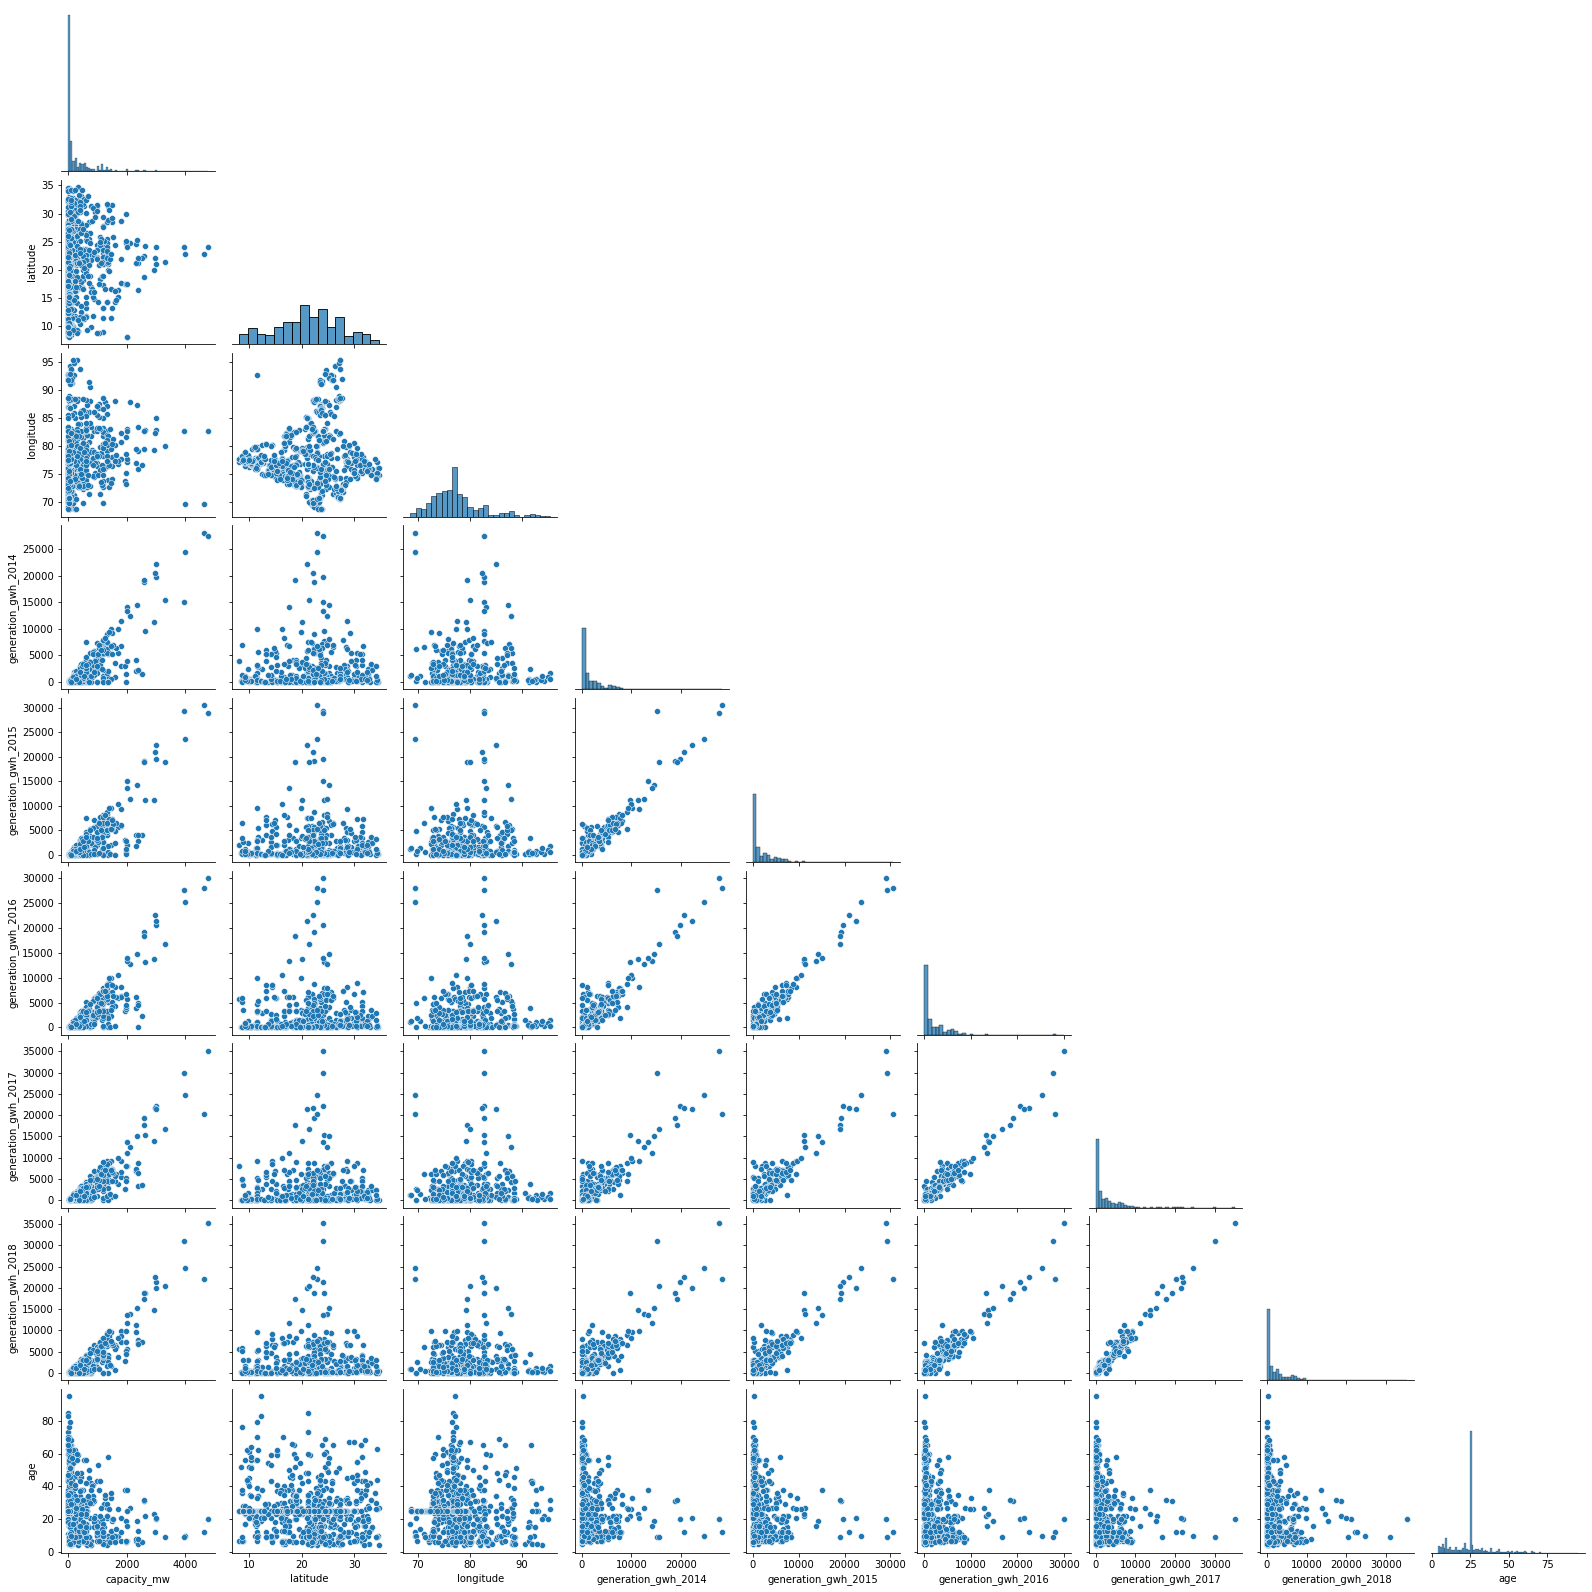

In [114]:
sns.pairplot(data, kind='scatter', corner=True)

Most of the features have a strong linear relationship i.e. have a strong correlation with each other.

Outliers in some of the columns are seen.

### Comparison between generation gwh of 2014-2018 with other_fuel1 and geolocation_source:

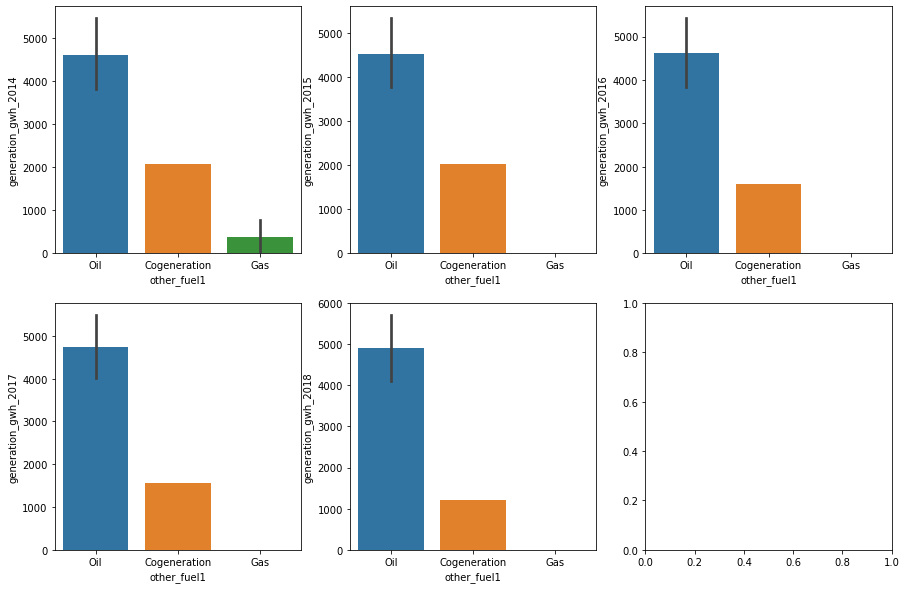

In [115]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

# Comparision between other_fuel1 and generation_gwh_2014
sns.barplot(x='other_fuel1',y='generation_gwh_2014',ax=axes[0,0],data=data)

# Comparision between other_fuel1 and generation_gwh_2015
sns.barplot(x='other_fuel1',y='generation_gwh_2015',ax=axes[0,1],data=data)

# Comparision between other_fuel1 and generation_gwh_2016
sns.barplot(x='other_fuel1',y='generation_gwh_2016',ax=axes[0,2],data=data)

# Comparision between other_fuel1 and generation_gwh_2017
sns.barplot(x='other_fuel1',y='generation_gwh_2017',ax=axes[1,0],data=data)

# Comparision between other_fuel1 and generation_gwh_2018
sns.barplot(x='other_fuel1',y='generation_gwh_2018',ax=axes[1,1],data=data)
plt.show()

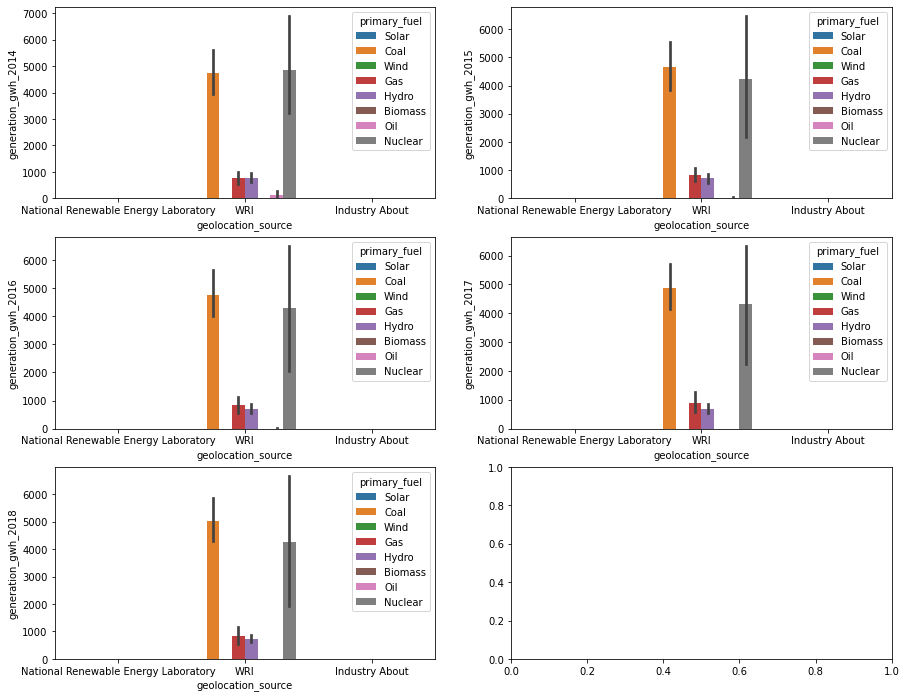

In [116]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

# Comparision between geolocation_source and generation_gwh_2014
sns.barplot(x='geolocation_source',y='generation_gwh_2014',ax=axes[0,0],data=data, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2015
sns.barplot(x='geolocation_source',y='generation_gwh_2015',ax=axes[0,1],data=data, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2016
sns.barplot(x='geolocation_source',y='generation_gwh_2016',ax=axes[1,0],data=data, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2017
sns.barplot(x='geolocation_source',y='generation_gwh_2017',ax=axes[1,1],data=data, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2018
sns.barplot(x='geolocation_source',y='generation_gwh_2018',ax=axes[2,0],data=data, hue= "primary_fuel")
plt.show()

Max other_fuel1 is Oil for every generation_gwh for years 2014-2018.

Min other_fuel1 is Gas for every generation_gwh for years 2014-2018.

For generation growth of 2014-2018 the maximum generation source is WRI and the maximym used primary fuel is coal followed by nuclear.

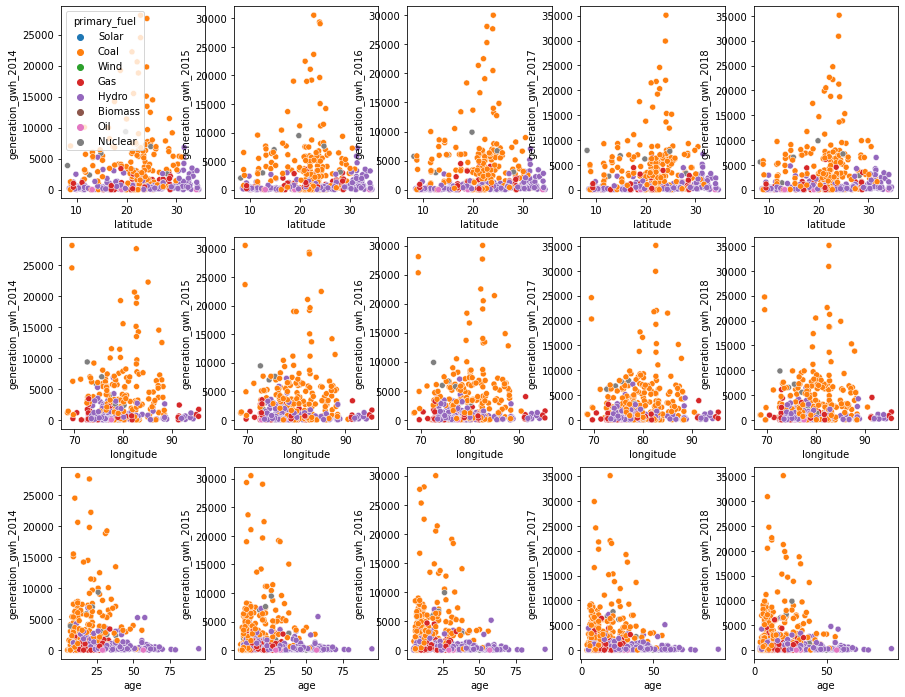

In [117]:
fig,axes=plt.subplots(3,5,figsize=(15,12))

sns.scatterplot(x='latitude',y='generation_gwh_2014',ax=axes[0,0],data=data, hue= "primary_fuel",legend="auto" )
sns.scatterplot(x='latitude',y='generation_gwh_2015',ax=axes[0,1],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2016',ax=axes[0,2],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2017',ax=axes[0,3],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2018',ax=axes[0,4],data=data, hue= "primary_fuel", legend= False)

sns.scatterplot(x='longitude',y='generation_gwh_2014',ax=axes[1,0],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2015',ax=axes[1,1],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2016',ax=axes[1,2],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2017',ax=axes[1,3],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2018',ax=axes[1,4],data=data, hue= "primary_fuel", legend= False)

sns.scatterplot(x='age',y='generation_gwh_2014',ax=axes[2,0],data=data, hue= "primary_fuel",legend= False)
sns.scatterplot(x='age',y='generation_gwh_2015',ax=axes[2,1],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2016',ax=axes[2,2],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2017',ax=axes[2,3],data=data, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2018',ax=axes[2,4],data=data, hue= "primary_fuel", legend= False)
plt.show()

No such information gained from year 2014-2018 the latitude with respect to generation_gwh plot.

For the relationship between generation_gwh for every year (2014-2018) Vs latitude, longitude and age, seems same for every year. The pattern is same for every year.

### Encoding categorical data

Here primary_fuel, other_fuel1, source, geolocation_source are categorical data. Let's convert them by level encoder

In [118]:
categorical_data =['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_data:
    data[i] = le.fit_transform(data[i])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,11.000000
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,24.908918
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,24.908918
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,18.000000
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,7.000000


All categorical data are encoded.check for the correlations

### Correlation

In [119]:
data.corr().T

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
capacity_mw,1.000000,0.050992,0.199247,-0.380086,-0.606173,-0.242483,0.205137,0.839094,0.844352,0.870620,0.886673,0.901918,-0.274332
latitude,0.050992,1.000000,0.036342,-0.010220,-0.032795,0.055935,-0.184291,0.060677,0.049134,0.041905,0.041711,0.041414,-0.102069
longitude,0.199247,0.036342,1.000000,-0.352329,-0.277577,-0.236743,0.249188,0.017769,0.027840,0.055967,0.055623,0.052362,-0.091765
primary_fuel,-0.380086,-0.010220,-0.352329,1.000000,0.476256,0.054645,-0.484724,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,0.126844
other_fuel1,-0.606173,-0.032795,-0.277577,0.476256,1.000000,0.254506,-0.204888,-0.420870,-0.403869,-0.419541,-0.435230,-0.429803,0.322491
source,-0.242483,0.055935,-0.236743,0.054645,0.254506,1.000000,-0.505614,NaN,NaN,NaN,NaN,NaN,-0.021531
geolocation_source,0.205137,-0.184291,0.249188,-0.484724,-0.204888,-0.505614,1.000000,NaN,NaN,NaN,NaN,NaN,0.007844
generation_gwh_2014,0.839094,0.060677,0.017769,-0.405019,-0.420870,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,-0.160014
generation_gwh_2015,0.844352,0.049134,0.027840,-0.393335,-0.403869,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,-0.170363
generation_gwh_2016,0.870620,0.041905,0.055967,-0.408951,-0.419541,NaN,NaN,0.937060,0.974918,1.000000,0.972024,0.962073,-0.193743


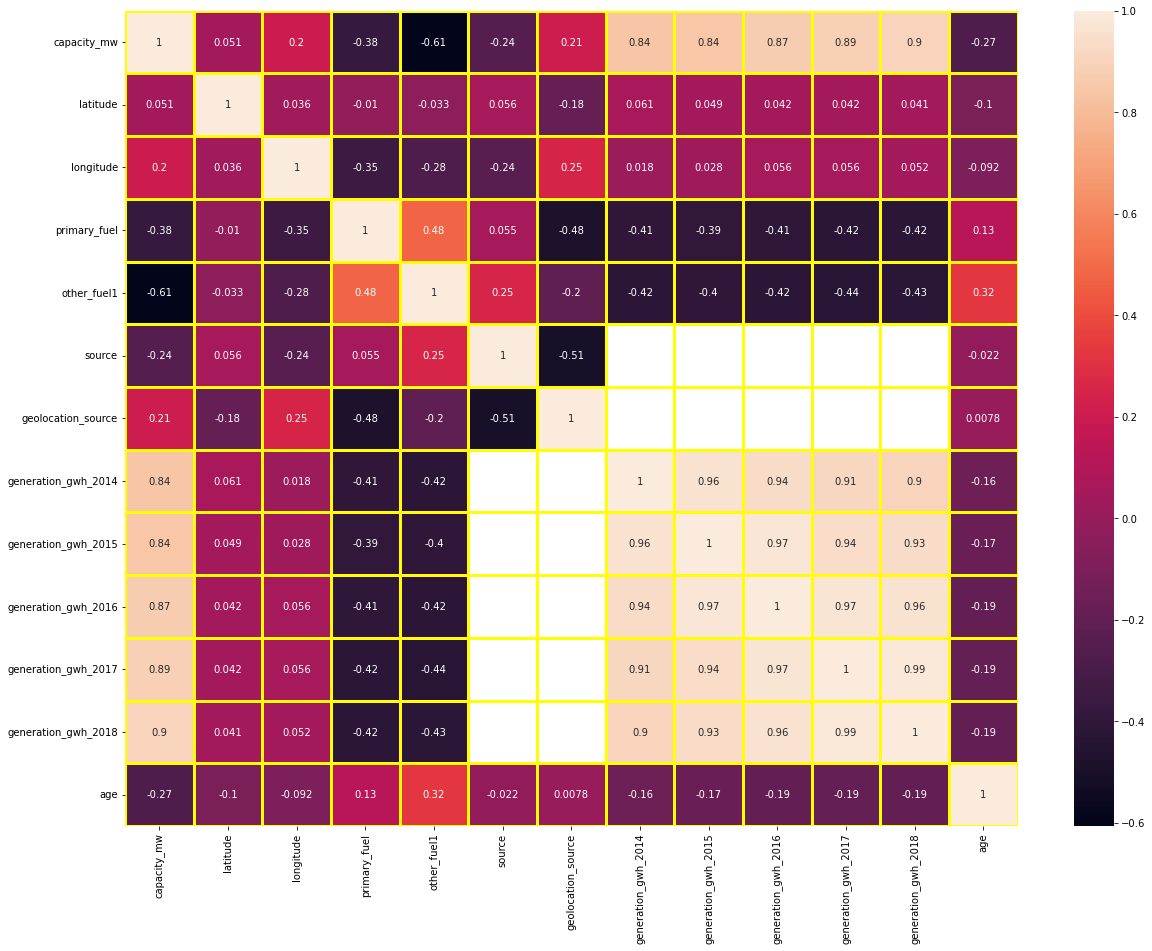

In [120]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

The correlation column is blank for source and geolocation source with generation_growth of different years.

The correlation between generation_growth of different years and capacity_mw is very strong.

capacity_mw is negatively correlated with the primary_fuel, source and age.

The correlation between generation_growth of different years and primary_fuel is negetive.

The correlation between primary_fuel Vs source and lattude is very less.

In [121]:
data_new= data.copy()
data_new1= data.copy()

### Correlation with Other features with primary_fuel (label_1):

<AxesSubplot:title={'center':'feature vs primary_fuel corr'}>

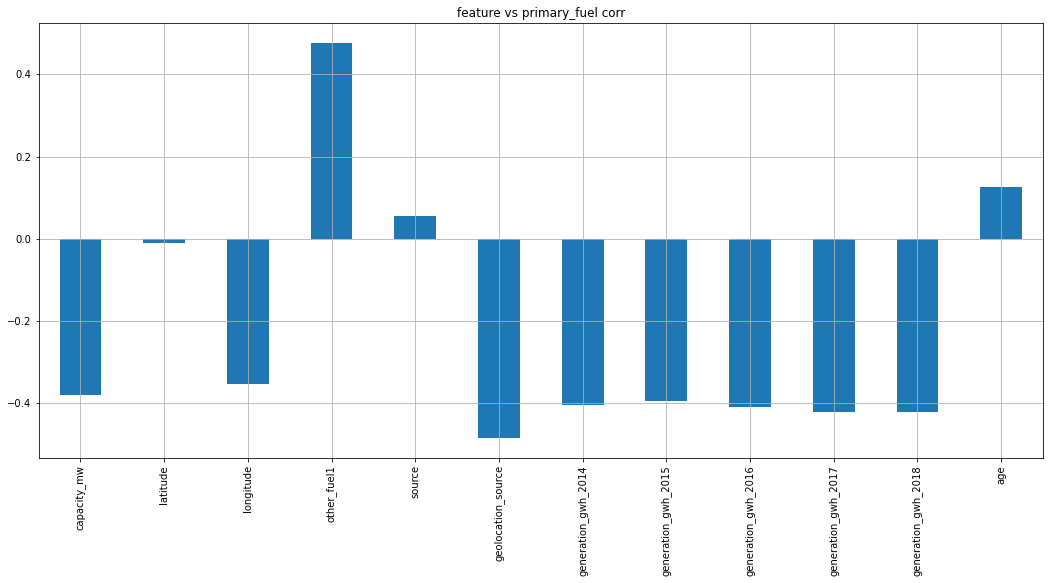

In [126]:
data_new.drop("primary_fuel", axis=1).corrwith(data_new["primary_fuel"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs primary_fuel corr')

<AxesSubplot:title={'center':'feature vs capacity_mw corr'}>

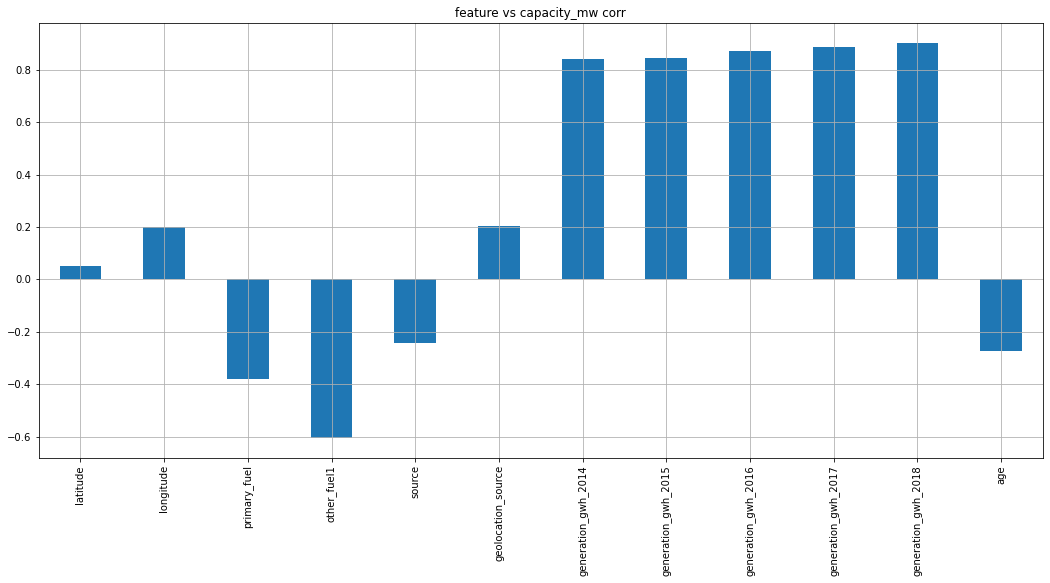

In [127]:
data_new1.drop("capacity_mw", axis=1).corrwith(data_new1["capacity_mw"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs capacity_mw corr')

### Correlation with Other features with capacity_mw (label_2)

<AxesSubplot:title={'center':'feature vs capacity_mw corr'}>

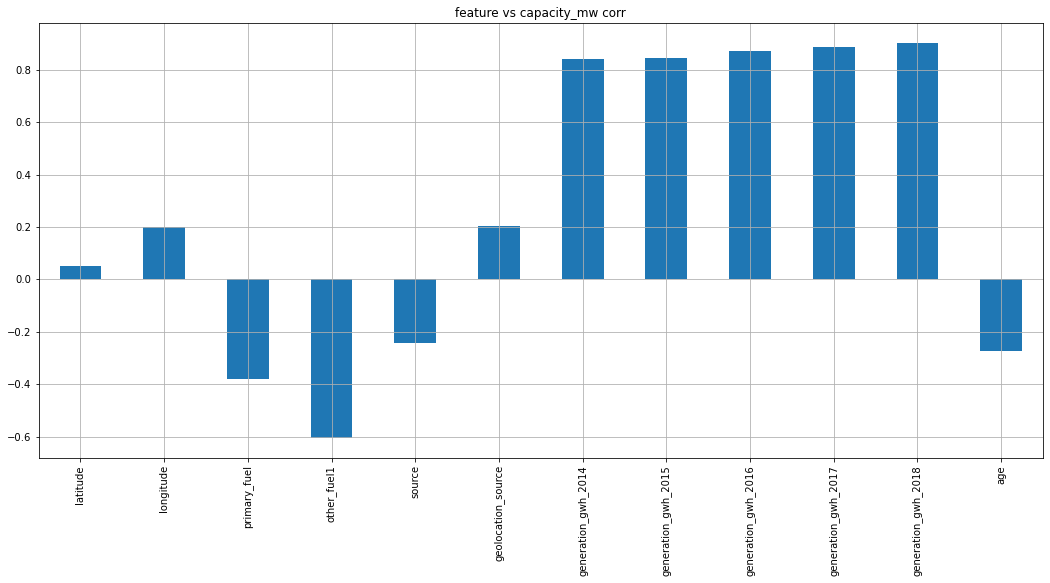

In [128]:
data_new1.drop("capacity_mw", axis=1).corrwith(data_new1["capacity_mw"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs capacity_mw corr')

### Outliers detection and removal

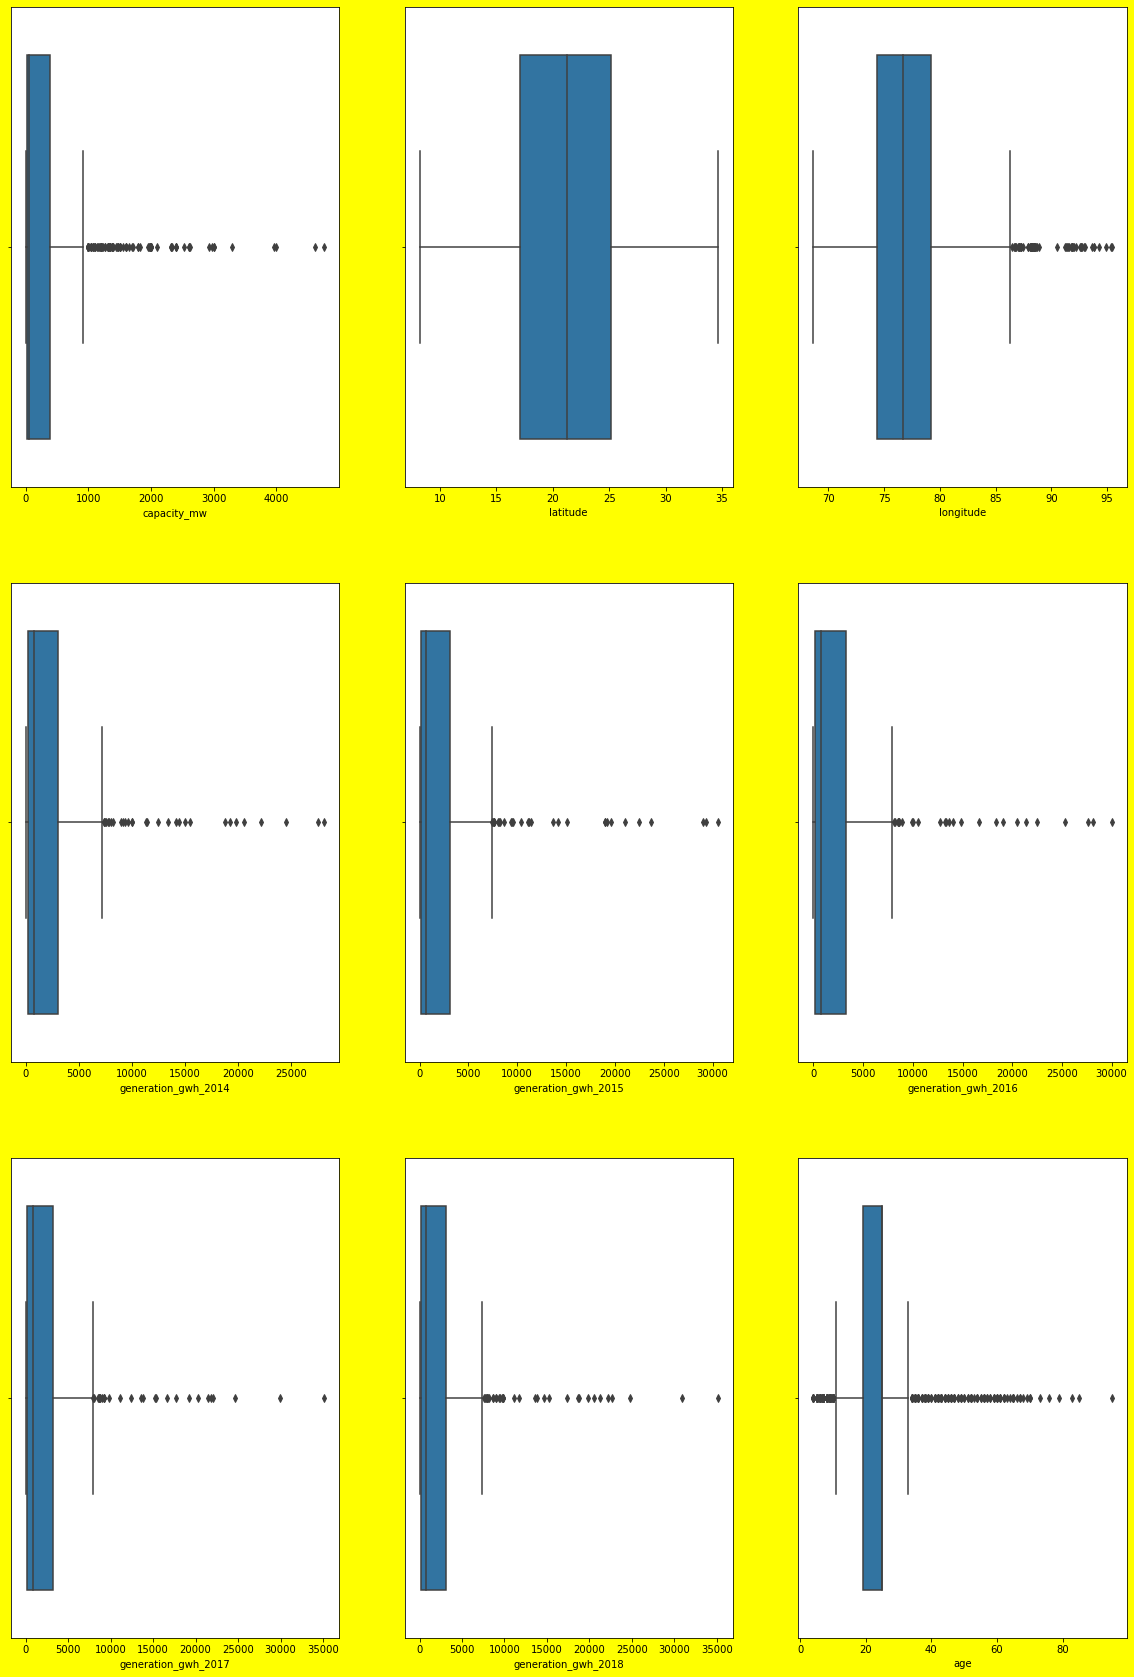

In [129]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
data1= data .drop(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], axis=1)
for x in data1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data1[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

capacity_mw               AxesSubplot(0.125,0.657941;0.227941x0.222059)
latitude               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
longitude              AxesSubplot(0.672059,0.657941;0.227941x0.222059)
generation_gwh_2014       AxesSubplot(0.125,0.391471;0.227941x0.222059)
generation_gwh_2015    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
generation_gwh_2016    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
generation_gwh_2017          AxesSubplot(0.125,0.125;0.227941x0.222059)
generation_gwh_2018       AxesSubplot(0.398529,0.125;0.227941x0.222059)
age                       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

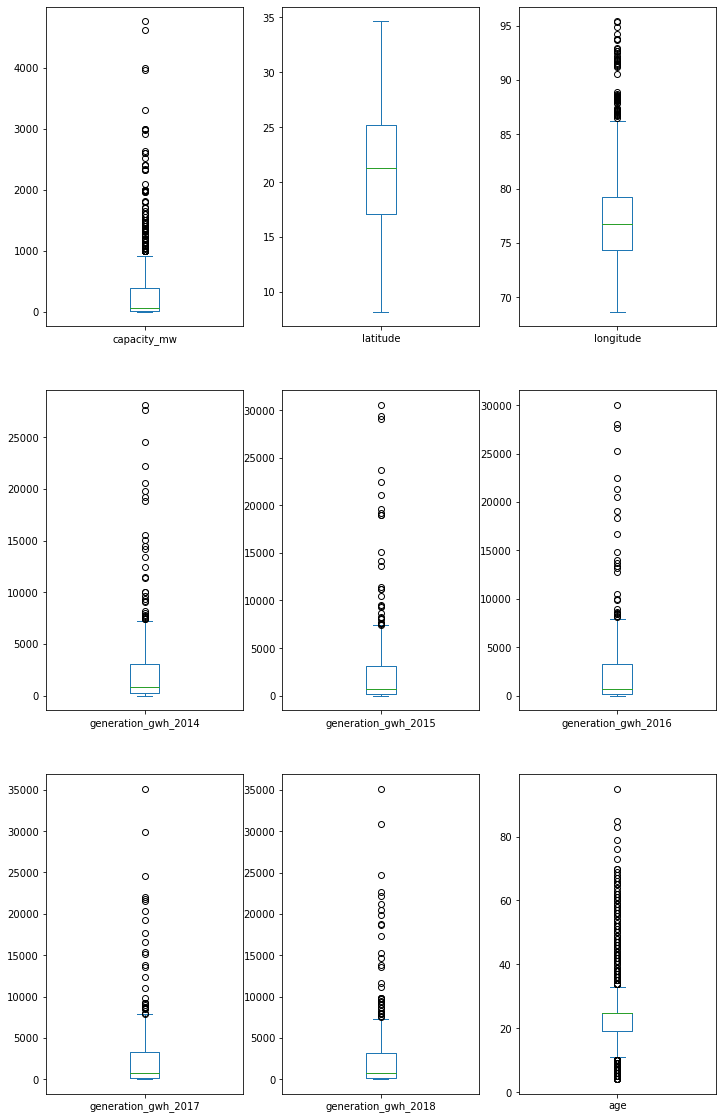

In [130]:
data1.plot(kind ='box', subplots =True , layout =(3,3), figsize = (12,20))

Outliers are present in the dataset.

From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.

### Using Quantile IQR method

In [131]:
data2= data.copy()

In [132]:
#1st quantile
q1= data2. quantile(0.1)
#3rd quantile
q3= data2. quantile(0.85)
#IQR
iqr= q3-q1

In [133]:
data_new = data2[~((data2 < (q1 - 1.5 *iqr)) |(data2 > (q3 + 1.5 *iqr))).any(axis=1)]
print(data_new.shape)

(865, 13)


In [134]:
data.shape

(906, 13)

In [135]:
# Loss of data
((906-865)/906)*100

4.525386313465784

### Checking Skewness

In [136]:
data_new.skew()

capacity_mw            1.912149
latitude              -0.139863
longitude              1.216802
primary_fuel           0.417534
other_fuel1           -1.625720
source                 1.754185
geolocation_source    -2.079925
generation_gwh_2014    1.617864
generation_gwh_2015    1.555440
generation_gwh_2016    1.613428
generation_gwh_2017    1.503471
generation_gwh_2018    1.534457
age                    1.066248
dtype: float64

Skewness present in this dataset. Need to removeit

In [137]:
data_new1= data_new.copy()

In [138]:
skew_data = ['latitude','longitude','other_fuel1', 'source','geolocation_source'
        ,'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [139]:
data_new1[skew_data] = scaler.fit_transform(data_new1[skew_data].values)
data_new1.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,1.142036,-0.926073,6,0.492764,1.540875,-2.255801,NaN,NaN,NaN,NaN,NaN,-1.252268
1,98.0,0.567077,-0.511421,1,0.492764,1.994077,0.407107,NaN,NaN,NaN,NaN,NaN,0.141361
2,39.2,0.091537,-2.399750,7,0.492764,-0.483747,0.407107,NaN,NaN,NaN,NaN,NaN,0.141361
3,135.0,0.417755,2.155020,2,0.492764,-0.416731,0.407107,-0.118793,0.108429,0.130512,-0.047289,-0.074125,-0.480194
5,250.0,0.400724,-2.738227,1,-2.029132,-0.416731,0.407107,0.242862,0.317427,0.296003,0.259988,0.167071,-0.579745


In [141]:
df= data_new1[skew_data]
df.shape

(865, 11)

In [142]:
data_new1.skew()

capacity_mw            1.912149
latitude              -0.075456
longitude              0.004248
primary_fuel           0.417534
other_fuel1           -1.539280
source                -0.183354
geolocation_source    -2.053320
generation_gwh_2014   -0.136175
generation_gwh_2015   -0.144564
generation_gwh_2016   -0.136951
generation_gwh_2017   -0.155301
generation_gwh_2018   -0.162547
age                    0.031391
dtype: float64

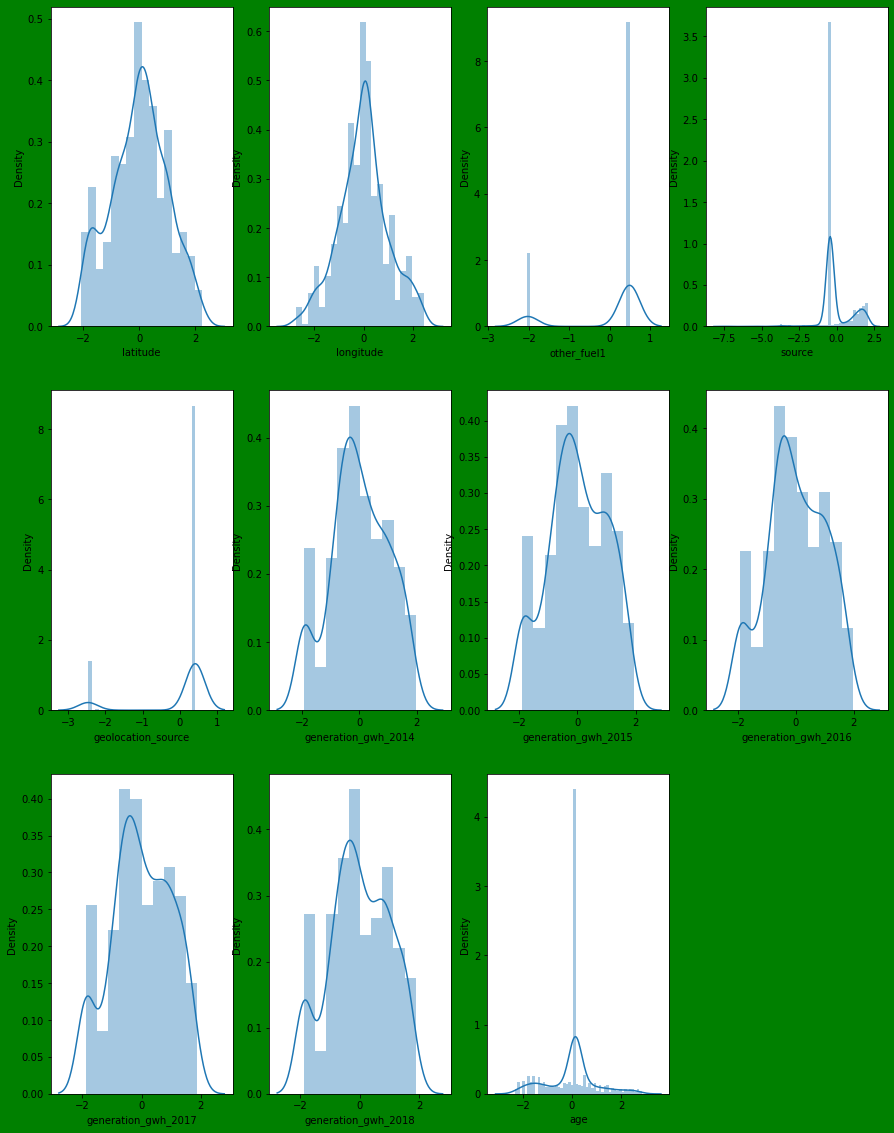

In [145]:
plt.figure(figsize=(15,20),facecolor='Green')
plotnumber=1
for x in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

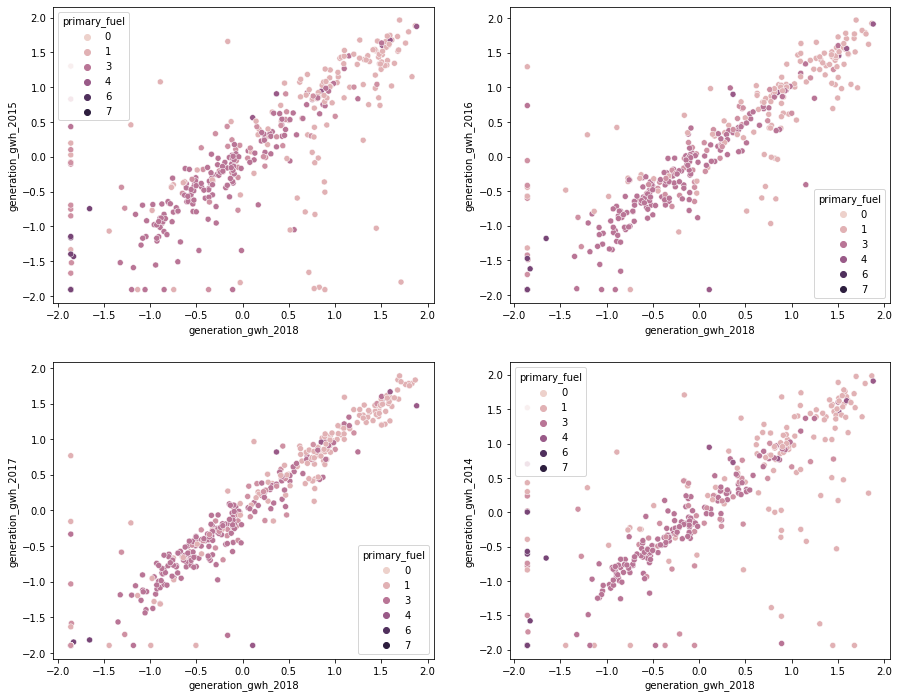

In [146]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2018',y='generation_gwh_2015',ax=axes[0,0],data=data_new1, hue= "primary_fuel")
sns.scatterplot(x='generation_gwh_2018',y='generation_gwh_2016',ax=axes[0,1],data=data_new1, hue= "primary_fuel")
sns.scatterplot(x='generation_gwh_2018',y='generation_gwh_2017',ax=axes[1,0],data=data_new1, hue= "primary_fuel")
sns.scatterplot(x='generation_gwh_2018',y='generation_gwh_2014',ax=axes[1,1],data=data_new1, hue= "primary_fuel")

plt.show()

generation_gwh of every year are highly correlated to each other, But as they have 50% missing data, lets remove all 5 of them. Let's drop all generation_gwh and geolocation_source.

In [147]:
data_new1.drop(["generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
                "generation_gwh_2018", "geolocation_source"], axis =1, inplace= True)

data_new1.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,age
0,2.5,1.142036,-0.926073,6,0.492764,1.540875,-1.252268
1,98.0,0.567077,-0.511421,1,0.492764,1.994077,0.141361
2,39.2,0.091537,-2.399750,7,0.492764,-0.483747,0.141361
3,135.0,0.417755,2.155020,2,0.492764,-0.416731,-0.480194
5,250.0,0.400724,-2.738227,1,-2.029132,-0.416731,-0.579745


Geolocation_source have also a highly skewed value and less correlation with target.Need remove.

In [148]:
data_new1.isna().sum()

capacity_mw     0
latitude        0
longitude       0
primary_fuel    0
other_fuel1     0
source          0
age             0
dtype: int64

### Checking Multicollinearity

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data_new1.values,i)for i in range(data_new1.shape[1])]
vif["Features"] = data_new1.columns
vif

,VIF,Features
0,2.009698,capacity_mw
1,1.013639,latitude
2,1.181081,longitude
3,1.504189,primary_fuel
4,2.100841,other_fuel1
5,1.087246,source
6,1.212224,age


multicollinearity is not present in the dataset

In [150]:
data_final1 =data_new1.copy() # for primary_fuel
data_final2 =data_new1.copy() # for capacity_mw

## Final predictions using different Classification ML Models for primary_fuel (label1):

### Standard Scaling

In [151]:
# Splitting data in target and dependent feature

x = data_final1.drop(['primary_fuel'], axis =1)
y = data_final1['primary_fuel']

In [152]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Find best Random state:

In [153]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.7649769585253456 on Random_state 360


In [154]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (648, 6)
Training target shape: (648,)
Test feature shape: (217, 6)
Test target shape: (217,)


### Using LogisticRegression

In [155]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=360)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.7649769585253456
cof_mat:
  [[ 5  0  0  1  0  0  1  2]
 [ 0 49  0  3  0  0  3  3]
 [ 1  2  4  5  0  0  1  1]
 [ 0  0  1 52  0  0  0 11]
 [ 0  0  1  1  0  0  0  0]
 [ 2  2  0  1  0  0  1  0]
 [ 1  1  0  1  0  0 28  1]
 [ 0  0  0  4  0  0  0 28]]
classification report:
                precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.91      0.84      0.88        58
           2       0.67      0.29      0.40        14
           3       0.76      0.81      0.79        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.82      0.88      0.85        32
           7       0.61      0.88      0.72        32

    accuracy                           0.76       217
   macro avg       0.54      0.53      0.52       217
weighted avg       0.75      0.76      0.75       217

-----------
-----------
training score :  0.6682098765432098
te

### Use GridSearchCV for hyperparameter tuning

In [157]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2','l1', 'elasticnet', 'none'], C=[10, 1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80], multi_class=['auto', 'ovr', 'multinomial'])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 10, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [158]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.7419354838709677
cof_mat:
  [[ 5  0  0  0  0  0  2  2]
 [ 0 49  0  4  0  0  3  2]
 [ 0  3  4  5  0  0  1  1]
 [ 0  0  1 49  2  0  1 11]
 [ 0  0  1  0  1  0  0  0]
 [ 1  3  0  1  0  0  1  0]
 [ 1  2  0  1  0  0 27  1]
 [ 0  0  0  6  0  0  0 26]]
classification report:
                precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.86      0.84      0.85        58
           2       0.67      0.29      0.40        14
           3       0.74      0.77      0.75        64
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         6
           6       0.77      0.84      0.81        32
           7       0.60      0.81      0.69        32

    accuracy                           0.74       217
   macro avg       0.59      0.58      0.57       217
weighted avg       0.73      0.74      0.73       217

-----------
-----------
training score :  0.6805555555555556
te

R2 score Not improved after using gridsearchCV but the difference of training and testing score is decreased.

### Using DecisionTreeClassifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.8709677419354839


cof_mat:  [[ 7  1  0  0  0  0  1  0]
 [ 0 52  4  0  0  0  1  1]
 [ 0  3  8  2  0  1  0  0]
 [ 0  0  2 59  0  3  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  1  2  0  0  3  0  0]
 [ 0  3  1  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.87      0.90      0.88        58
           2       0.44      0.57      0.50        14
           3       0.95      0.92      0.94        64
           4       0.00      0.00      0.00         2
           5       0.43      0.50      0.46         6
           6       0.93      0.88      0.90        32
           7       0.97      1.00      0.98        32

    accuracy                           0.87       217
   macro avg       0.70      0.69      0.69       217
weighted avg       0.87      0.87      0.87       217

-----------
-----------
training score :  1.0
testing score

### Use GridSearchCV for hyperparameter tuning

In [160]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10, 0.0001,1,0.05,0.5],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=9, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 3, 'splitter': 'best'}


In [161]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.8294930875576036


cof_mat:  [[ 6  2  0  0  0  0  1  0]
 [ 1 47  2  3  1  0  3  1]
 [ 0  5  7  2  0  0  0  0]
 [ 0  2  1 60  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  1  4  1  0  0  0  0]
 [ 0  2  0  0  0  1 29  0]
 [ 0  0  0  0  0  0  1 31]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.80      0.81      0.80        58
           2       0.47      0.50      0.48        14
           3       0.90      0.94      0.92        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.85      0.91      0.88        32
           7       0.97      0.97      0.97        32

    accuracy                           0.83       217
   macro avg       0.60      0.60      0.60       217
weighted avg       0.81      0.83      0.82       217

-----------
-----------
training score :  0.962962962962962

Accuracy score is not improved after using GridSearchCV with DecisionTreeClassifier().

But the difference between training score, testing score is decreased.

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8847926267281107


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 53  0  0  3  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  1 62  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.85      0.91      0.88        58
           2       0.73      0.57      0.64        14
           3       0.93      0.97      0.95        64
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       0.91      0.91      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.88       217
   macro avg       0.76      0.67      0.70       217
weighted avg       0.88      0.88      0.88       217

-----------
-----------
training score :  1.0
testing score

### Using Gridsearch CV

In [163]:
param= {"min_samples_split" : [2,3], "max_depth":[3,5], "learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2],"loss" :['log_loss', 'deviance'], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [164]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.9032258064516129


cof_mat:  [[ 7  0  0  0  0  0  2  0]
 [ 0 53  0  0  3  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  0 63  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  1  1  0  2  0  0]
 [ 0  1  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:

                precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.91      0.91      0.91        58
           2       0.80      0.57      0.67        14
           3       0.93      0.98      0.95        64
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       0.91      0.97      0.94        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.76      0.69      0.72       217
weighted avg       0.90      0.90      0.90       217

-----------
-----------
training score :  0.998456790123456

Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

### Using RandomForestClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8894009216589862


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  2 62  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  3  2  1  0  0  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:                precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.85      0.97      0.90        58
           2       0.62      0.57      0.59        14
           3       0.93      0.97      0.95        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.91      0.91      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.89       217
   macro avg       0.66      0.63      0.64       217
weighted avg       0.86      0.89      0.87       217

-----------
-----------
training score :  1.0
testing score :

### Use GridSearchCV for hyperparameter tuning

In [166]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


In [167]:
grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.9124423963133641


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 57  0  0  0  0  0  1]
 [ 0  3  9  2  0  0  0  0]
 [ 0  0  0 63  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.86      0.98      0.92        58
           2       0.82      0.64      0.72        14
           3       0.94      0.98      0.96        64
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       0.94      0.91      0.92        32
           7       0.97      1.00      0.98        32

    accuracy                           0.91       217
   macro avg       0.77      0.69      0.72       217
weighted avg       0.90      0.91      0.90       217

-----------
-----------
training score :  1.0
testing score 

Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier() and difference of training and testing is also decreased.

### ExtraTreesClassifier

In [168]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8940092165898618


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 55  1  0  0  0  1  1]
 [ 0  3  7  4  0  0  0  0]
 [ 0  0  1 63  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:                precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.86      0.95      0.90        58
           2       0.64      0.50      0.56        14
           3       0.91      0.98      0.95        64
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.91      0.91      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.89       217
   macro avg       0.79      0.67      0.70       217
weighted avg       0.89      0.89      0.88       217

-----------
-----------
training score :  1.0
testing score :

### Use GridSearchCV for hyperparameter tuning

In [169]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"],"ccp_alpha":[0, 0.001, 0.01] }

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [170]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9032258064516129


cof_mat:  [[ 6  0  0  0  0  0  3  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  2 62  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  2  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.89      0.97      0.93        58
           2       0.67      0.57      0.62        14
           3       0.93      0.97      0.95        64
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.88      0.94      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.79      0.68      0.71       217
weighted avg       0.90      0.90      0.89       217

-----------
-----------
training score :  0.9922839506172839

Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

### Using AdaBoostClassifier

In [171]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.511520737327189


cof_mat:  [[ 0  0  8  0  0  0  0  1]
 [ 0  0 53  0  1  0  0  4]
 [ 0  0  4 10  0  0  0  0]
 [ 0  0  0 63  1  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  5  1  0  0  0  0]
 [ 0  0 12  0  0  0 18  2]
 [ 0  0  0  0  0  0  6 26]]


classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        58
           2       0.05      0.29      0.08        14
           3       0.83      0.98      0.90        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.75      0.56      0.64        32
           7       0.79      0.81      0.80        32

    accuracy                           0.51       217
   macro avg       0.30      0.33      0.30       217
weighted avg       0.47      0.51      0.48       217

-----------
-----------
training score :  0.4984567901234568
t

### Using GridSearchCV for hyperparameter tuning

In [172]:
params = {'n_estimators' : [50,40,70, 75, 45], 'learning_rate': [1,0.1,0.01,0.5,0.15, 0.001, 0.002, 0.05,]}

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.01, 'n_estimators': 50}


In [173]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.7926267281105991


cof_mat:  [[ 0  0  0  0  0  0  8  1]
 [ 0 46  0  0  0  0  8  4]
 [ 0  2  0 10  0  0  2  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  1  0  1  0  0  4  0]
 [ 0  0  0  0  0  0 30  2]
 [ 0  0  0  0  0  0  0 32]]


classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.94      0.79      0.86        58
           2       0.00      0.00      0.00        14
           3       0.83      1.00      0.91        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.58      0.94      0.71        32
           7       0.82      1.00      0.90        32

    accuracy                           0.79       217
   macro avg       0.40      0.47      0.42       217
weighted avg       0.70      0.79      0.74       217

-----------
-----------
training score :  0.7175925925925926

Accuracy score are improved after using GridSearchCV with AdaBoostClassifier

### Using SVC('rbf')

In [175]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [176]:
svmkernel('rbf')

accu score :  0.7419354838709677


cof_mat:  [[ 5  0  0  0  0  0  1  3]
 [ 0 50  0  2  0  0  3  3]
 [ 2  2  3  5  0  0  0  2]
 [ 0  0  4 44  0  0  0 16]
 [ 0  0  0  2  0  0  0  0]
 [ 3  2  0  0  0  0  0  1]
 [ 2  2  0  0  0  0 27  1]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.89      0.86      0.88        58
           2       0.43      0.21      0.29        14
           3       0.83      0.69      0.75        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.87      0.84      0.86        32
           7       0.55      1.00      0.71        32

    accuracy                           0.74       217
   macro avg       0.50      0.52      0.49       217
weighted avg       0.74      0.74      0.73       217

-----------
-----------
training score :  0.697530864197530

### Using SVC('poly')

In [177]:
svmkernel('poly')

accu score :  0.3456221198156682


cof_mat:  [[ 0  0  0  9  0  0  0  0]
 [ 0 11  0 47  0  0  0  0]
 [ 0  0  0 14  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]]


classification report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.19      0.32        58
           2       0.00      0.00      0.00        14
           3       0.31      1.00      0.47        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        32

    accuracy                           0.35       217
   macro avg       0.16      0.15      0.10       217
weighted avg       0.36      0.35      0.23       217

-----------
-----------
training score :  0.331790123456790

### Using SVC('linear')

In [178]:
svmkernel('linear')

accu score :  0.8202764976958525


cof_mat:  [[ 6  0  0  1  0  0  1  1]
 [ 0 51  0  2  0  0  2  3]
 [ 2  2  0 10  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 3  2  0  1  0  0  0  0]
 [ 1  4  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.86      0.88      0.87        58
           2       0.00      0.00      0.00        14
           3       0.80      1.00      0.89        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.89      0.78      0.83        32
           7       0.84      1.00      0.91        32

    accuracy                           0.82       217
   macro avg       0.49      0.54      0.51       217
weighted avg       0.74      0.82      0.78       217

-----------
-----------
training score :  0.765432098765432

svmkernel('linear') is better than other in SVM

### Among 7 models the best model is RandomforestClassifier() .Let's check Cross validations

### Cross validations

In [179]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.65322581 0.69354839 0.65322581 0.64516129 0.71544715 0.7398374
 0.65853659]

Mean CV Score : 0.679854632647709

Std deviation : 0.03407670887786728

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, max_features='sqrt',
                       min_samples_split=3)

 Cross Validation Score :  [0.82258065 0.7983871  0.7983871  0.80645161 0.76422764 0.82113821
 0.80487805]

Mean CV Score : 0.8022929077217038

Std deviation : 0.018008691137044997

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier(learning_rate=1.0, min_samples_split=3)

 Cross Validation Score :  [0.02419355 0.92741935 0.07258065 0.83064516 0.82113821 0.88617886
 0.8699187 ]

Mean CV Score : 0.633153497433592

Std deviation : 0.37150030625276975

-----------
-----------
Cross Validation Score of : RandomForestClassifier(n_estimators=80)

 Cross Validation Score :  [0.83064516

Among 7 classification models RandomforestClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.

### Final Model

In [180]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([3, 6, 1, 1, 7, 6, 3, 6, 7, 3, 1, 3, 0, 3, 1, 1, 5, 1, 6, 3, 1, 7,
       1, 7, 1, 3, 6, 7, 7, 2, 1, 6, 1, 7, 0, 3, 1, 3, 1, 1, 3, 3, 1, 1,
       2, 7, 1, 1, 1, 6, 3, 6, 1, 7, 6, 1, 6, 3, 2, 1, 7, 1, 6, 6, 3, 3,
       1, 3, 3, 3, 3, 6, 6, 1, 2, 0, 6, 3, 3, 3, 6, 3, 6, 3, 7, 1, 0, 2,
       6, 1, 6, 6, 6, 3, 3, 3, 1, 7, 2, 1, 1, 1, 5, 7, 2, 7, 7, 1, 3, 3,
       2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 7, 7, 6,
       5, 2, 7, 1, 3, 7, 6, 3, 3, 1, 7, 1, 6, 7, 3, 7, 3, 3, 3, 1, 3, 1,
       1, 7, 6, 1, 3, 6, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 3, 6, 3, 6, 3,
       7, 1, 3, 1, 2, 3, 3, 3, 1, 6, 7, 7, 1, 1, 1, 3, 3, 1, 3, 1, 3, 7,
       3, 7, 0, 3, 6, 7, 3, 3, 3, 1, 7, 1, 1, 3, 7, 6, 7, 7, 3])

In [181]:
y_prob = grid_rf_best.predict_proba(x_test)
from sklearn.metrics import roc_auc_score

macro_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")


print("One-Vs-One AUC ROC Sore: ", macro_ovo, "when avg = macro")
print("==========================")
print("One-Vs-Rest AUC ROC Sore: ", macro_ovr, "when avg = macro")

One-Vs-One AUC ROC Sore:  0.9427307241854777 when avg = macro
One-Vs-Rest AUC ROC Sore:  0.9560660405409016 when avg = macro


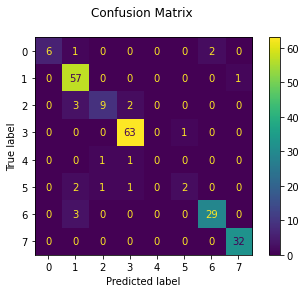

In [182]:
from sklearn import metrics
class_names = data_final1.columns
metrics.plot_confusion_matrix(grid_rf_best, x_test, y_test)
plt.title('Confusion Matrix \n')
plt.show()

### Load and save the model

Now , let's save the model for future use.

In [183]:
import pickle
pickle.dump(grid_rf_best, open("Power_Plant_Classification_model_primary_fuel", "wb"))
load_Power_Plant_Classification_model_primary_fuel= pickle.load(open("Power_Plant_Classification_model_primary_fuel", "rb"))

In [184]:
y_pred = load_Power_Plant_Classification_model_primary_fuel.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.head(8)

,Predicted Values,Actual Values
0,3,3
1,6,6
2,1,1
3,1,1
4,7,7
5,6,6
6,3,3
7,6,6


In [185]:
feature= x.columns
feature

Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel1', 'source', 'age'], dtype='object')

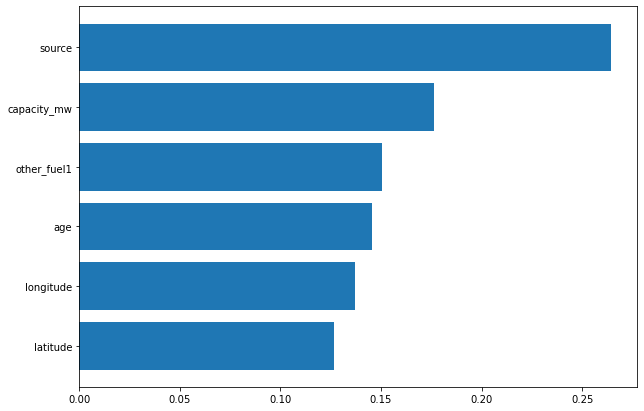

In [186]:
fimp = list(zip(feature,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

Importance features as par graph is "source" of power palnts.

### Final predictions using different Classification ML Models for capacity_mw (label2)

### Standad Scaling

In [187]:
# Splitting data in target and dependent feature
data_final2.drop(['source'], axis =1, inplace= True)

x = data_final2.drop(['capacity_mw'], axis =1)  # for capacity_mw
y = data_final2['capacity_mw']

In [188]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Find best Random state

In [189]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(1000,3000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.6234282706745264 on Random_state 1636


In [190]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (648, 5)
Training target shape: (648,)
Test feature shape: (217, 5)
Test target shape: (217,)


For random state=1636, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=1636)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6234282706745264
Mean absolute error: 165.1117294943447
Mean square error: 57517.75984403492
Root mean square error: 239.82860514132778


### Using GridSearchCV:

In [192]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [193]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6234282706745264
Mean absolute error: 165.1117294943447
Mean square error: 57517.75984403492
Root mean square error: 239.82860514132778


No such improvement seen after GridSearchCV.

### Using DecisionTreeRegressor

In [194]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.2986081604158929
Mean absolute error: 172.3879216589862
Mean square error: 107130.95074350692
Root mean square error: 327.3086475232619


### Using GridSearchCV

In [195]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [196]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5316292147323365
Mean absolute error: 161.6630237280371
Mean square error: 71539.19491843585
Root mean square error: 267.4681194431139


After using Gridseaech CV, R2 is slightly improved.

### Using KNeighborsRegressor():

In [197]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 336.3712557378171
RMSE value for k=  2 is: 300.5647024624805
RMSE value for k=  3 is: 289.05096358578703
RMSE value for k=  4 is: 271.34983165152096
RMSE value for k=  5 is: 255.28372040404764
RMSE value for k=  6 is: 254.69693523140768
RMSE value for k=  7 is: 244.79376297898645
RMSE value for k=  8 is: 244.28510807375287
RMSE value for k=  9 is: 242.81981587059698
RMSE value for k=  10 is: 242.15168279563946
RMSE value for k=  11 is: 238.67057564037202
RMSE value for k=  12 is: 237.53973825271223
RMSE value for k=  13 is: 241.44520617100233
RMSE value for k=  14 is: 244.49366691027362
RMSE value for k=  15 is: 245.87057381268812
RMSE value for k=  16 is: 250.03885528773296
RMSE value for k=  17 is: 249.158302469918
RMSE value for k=  18 is: 248.86039057836143
RMSE value for k=  19 is: 251.120079120107
RMSE value for k=  20 is: 252.93086442862605


In [198]:
min(rmse_val)

237.53973825271223

### For k=12 we get the best RMSE value for KNeighborsRegressor

In [199]:
knn =KNeighborsRegressor(n_neighbors= 12)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6305817924195053
Mean absolute error: 144.1135752688172
Mean square error: 56425.12724916704
Root mean square error: 237.53973825271223


### Using GridSearchCV

In [200]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25,34], 'n_jobs':[1,-1],
             'n_neighbors' : [12],'weights': ['uniform', 'distance'], 'p':[1,2,3]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 12, 'p': 2, 'weights': 'distance'}


In [201]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6332568456548817
Mean absolute error: 142.69494319724146
Mean square error: 56016.53824053914
Root mean square error: 236.67813215533695


Nothing is slightly improved after GridSearchCV.

### Using RandomForestRegressor

In [202]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6269651432620515
Mean absolute error: 145.889356531689
Mean square error: 56977.536103785955
Root mean square error: 238.69967763653548


In [205]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.08537433102926606
Mean absolute error: 210.0085858037114
Mean square error: 165780.63420970234


In [207]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.1689939220141704
Mean absolute error: 189.27100711715744
Mean square error: 126928.29625882639


In [208]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', )
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.4364194813974449
Mean absolute error: 162.895994880018
Mean square error: 86081.57861404707


### Using GridSearchCV

In [209]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.5,0.1], 'tol':[0.01,0.001,0.002], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.002}


In [210]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5535086162808955
Mean absolute error: 144.4185068451339
Mean square error: 68197.32385961949
Root mean square error: 261.14617335817786


In [238]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5980903480310787
Mean absolute error: 157.47113055164854
Mean square error: 61387.88719576963
Root mean square error: 247.76579101193457


r2 score, RMSE are very poor after using svm.

### Using GradientBoostingRegressor

In [211]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.603009254872535
Mean absolute error: 156.08941778739322
Mean square error: 60636.57083192882
Root mean square error: 246.24494072351786


### Using AdaBoostRegressor

In [222]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.44736200735593445
Mean absolute error: 222.14867645929027
Mean square error: 84410.2115645479
Root mean square error: 290.5343552224898


### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is randomforestRegression().
Let's check the cross validation score before final prediction.

### Cross Validation

In [226]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_svr_best , grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.42625861 0.4197586  0.50706124 0.48573785 0.40430015]

Mean CV Score : 0.44862328943647006

Std deviation : 0.04022530336163316

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=3,
                      splitter='random')

 Cross Validation Score :  [0.28414528 0.33965071 0.40348844 0.40785827 0.42928971]

Mean CV Score : 0.37288648068725

Std deviation : 0.05351718973796613

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_jobs=1, n_neighbors=12, weights='distance')

 Cross Validation Score :  [0.40197774 0.49212573 0.60769081 0.54398281 0.49549477]

Mean CV Score : 0.5082543737876347

Std deviation : 0.0676487820409149

-----------
-----------
Cross Validation Score of : RandomForestClassifier(n_estimators=80)

 Cross Validation Score :  [nan nan nan nan nan]

Mean CV Score : nan

Std deviation : nan

-----------
--

### Also randomforest is the best model with max cv score and min std

In [227]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha

3.7899959024319254

In [228]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.6208119905767581


In [229]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha 

0.049100000000000005

In [230]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.6234170844710643


After using LASSO() and Ridge(), there is no large change in score. So this model is not OVERFITTED.

### Conclusion

### Our final model is RandomForestRegressor() for this particular dataset for calculating capacity_mw

### Final Model

In [ ]:
y_pred = grid_rf_best.predict(x_test)
y_pred

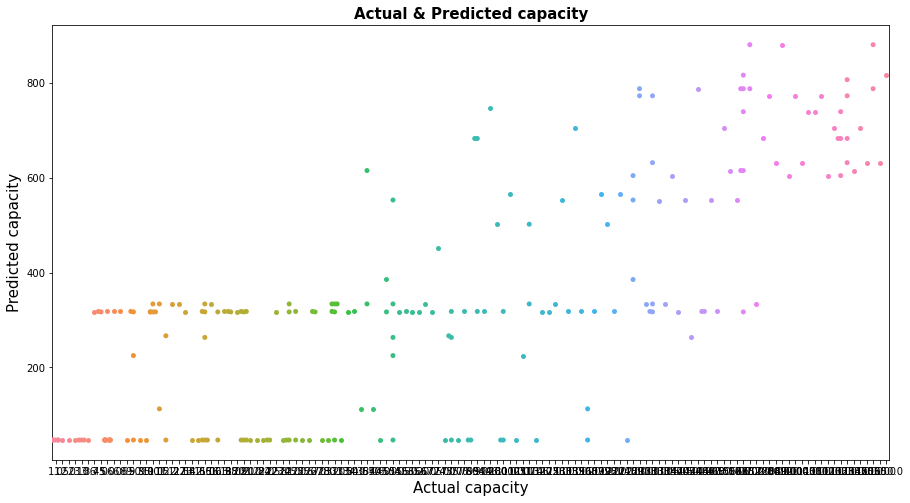

In [232]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(15,8))
sns.swarmplot(y_test.round(2), y_pred)
plt.xlabel("Actual capacity", fontsize= 15)
plt.ylabel("Predicted capacity",fontsize= 15)
plt.title("Actual & Predicted capacity" , fontsize= 15, fontweight= 'bold')
plt.show()

In [240]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.5980903480310787

Final Mean absolute error: 157.47113055164854

Final Mean square error: 61387.88719576963

Final Root mean square error: 247.76579101193457


In [241]:
feature= x.columns
feature

Index(['latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'age'], dtype='object')

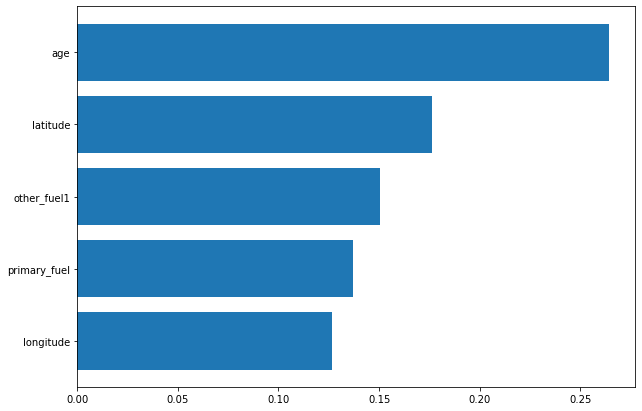

In [242]:
fimp = list(zip(feature,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

Other-fuel1 is the most important feature for predicting capacity_mw

### Load and save the model

saving the model for future use

In [244]:
import pickle
pickle.dump(grid_rf_best, open("Power_Plant_Regression_model_capacity", "wb"))
load_Power_Plant_Regression_model_capacity= pickle.load(open("Power_Plant_Regression_model_capacity", "rb"))

# Thank you